<a href="https://colab.research.google.com/github/arka57/Ted-Talk-Views-Prediction/blob/main/TedTalks_View_Regression_V2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

TED stands for Technology, Entertainment and Design.

A TED talk refers to a recorded public-speaking presentation that was originally given at the main TED (technology, entertainment and design) annual event or one of its many satellite events around the world. TED is a nonprofit devoted to spreading ideas, usually in the form of short, powerful talks, often called "TED talks." These could be a motivational video, awareness, technical, Science entertainment, or any other genre.

TED is devoted to spreading powerful ideas on just about any topic. Founded in 1984 by Richard Salman as a nonprofit organization that aimed at bringing experts from the fields of Technology, Entertainment, and Design together, TED Conferences have gone on to become the Mecca of ideas from virtually all walks of life. As of 2015, TED and its sister TEDx chapters have published more than 2000 talks for free consumption by the masses and its speaker list boasts of the likes of Al Gore, Jimmy Wales, Shahrukh Khan, and Bill Gates.

# **Project Name**

Project Type - Regression\
Contribution - Individual

# **Project Summary**

# **Problem Statement**

### **Data Analysis**

# **Importing Libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score,mean_squared_error,accuracy_score

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

from xgboost import XGBRegressor

plt.rcParams["figure.figsize"] = [10, 5]

# **Loading Data**

In [2]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive

Mounted at /gdrive
/gdrive


In [3]:
cd MyDrive/Ted_Talks_Views_Prediction/

/gdrive/MyDrive/Ted_Talks_Views_Prediction


In [4]:
data=pd.read_csv('data_ted_talks.csv')
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# **Dataset Description**

In [5]:
data.head(5)

,talk_id,title,speaker_1,all_speakers,occupations,about_speakers,views,recorded_date,published_date,event,native_lang,available_lang,comments,duration,topics,related_talks,url,description,transcript
0,1,Averting the climate crisis,Al Gore,{0: 'Al Gore'},{0: ['climate advocate']},{0: 'Nobel Laureate Al Gore focused the world’...,3523392,2006-02-25,2006-06-27,TED2006,en,"['ar', 'bg', 'cs', 'de', 'el', 'en', 'es', 'fa...",272.0,977,"['alternative energy', 'cars', 'climate change...","{243: 'New thinking on the climate crisis', 54...",https://www.ted.com/talks/al_gore_averting_the...,With the same humor and humanity he exuded in ...,"Thank you so much, Chris. And it's truly a gre..."
1,92,The best stats you've ever seen,Hans Rosling,{0: 'Hans Rosling'},{0: ['global health expert; data visionary']},"{0: 'In Hans Rosling’s hands, data sings. Glob...",14501685,2006-02-22,2006-06-27,TED2006,en,"['ar', 'az', 'bg', 'bn', 'bs', 'cs', 'da', 'de...",628.0,1190,"['Africa', 'Asia', 'Google', 'demo', 'economic...","{2056: ""Own your body's data"", 2296: 'A visual...",https://www.ted.com/talks/hans_rosling_the_bes...,You've never seen data presented like this. Wi...,"About 10 years ago, I took on the task to teac..."
2,7,Simplicity sells,David Pogue,{0: 'David Pogue'},{0: ['technology columnist']},{0: 'David Pogue is the personal technology co...,1920832,2006-02-24,2006-06-27,TED2006,en,"['ar', 'bg', 'de', 'el', 'en', 'es', 'fa', 'fr...",124.0,1286,"['computers', 'entertainment', 'interface desi...","{1725: '10 top time-saving tech tips', 2274: '...",https://www.ted.com/talks/david_pogue_simplici...,New York Times columnist David Pogue takes aim...,"(Music: ""The Sound of Silence,"" Simon & Garfun..."
3,53,Greening the ghetto,Majora Carter,{0: 'Majora Carter'},{0: ['activist for environmental justice']},{0: 'Majora Carter redefined the field of envi...,2664069,2006-02-26,2006-06-27,TED2006,en,"['ar', 'bg', 'bn', 'ca', 'cs', 'de', 'en', 'es...",219.0,1116,"['MacArthur grant', 'activism', 'business', 'c...",{1041: '3 stories of local eco-entrepreneurshi...,https://www.ted.com/talks/majora_carter_greeni...,"In an emotionally charged talk, MacArthur-winn...",If you're here today — and I'm very happy that...
4,66,Do schools kill creativity?,Sir Ken Robinson,{0: 'Sir Ken Robinson'},"{0: ['author', 'educator']}","{0: ""Creativity expert Sir Ken Robinson challe...",65051954,2006-02-25,2006-06-27,TED2006,en,"['af', 'ar', 'az', 'be', 'bg', 'bn', 'ca', 'cs...",4931.0,1164,"['children', 'creativity', 'culture', 'dance',...","{865: 'Bring on the learning revolution!', 173...",https://www.ted.com/talks/sir_ken_robinson_do_...,Sir Ken Robinson makes an entertaining and pro...,Good morning. How are you? (Audience) Good. It...


In [6]:
data.describe()

,talk_id,views,comments,duration
count,4005.000000,4.005000e+03,3350.000000,4005.000000
mean,12432.538327,2.148006e+06,161.997015,724.011236
std,17447.576262,3.451226e+06,268.838922,361.775462
min,1.000000,0.000000e+00,0.000000,60.000000
25%,1252.000000,8.820690e+05,38.000000,393.000000
50%,2333.000000,1.375508e+06,89.000000,738.000000
75%,23777.000000,2.133110e+06,188.000000,974.000000
max,62794.000000,6.505195e+07,6449.000000,3922.000000


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4005 entries, 0 to 4004
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   talk_id         4005 non-null   int64  
 1   title           4005 non-null   object 
 2   speaker_1       4005 non-null   object 
 3   all_speakers    4001 non-null   object 
 4   occupations     3483 non-null   object 
 5   about_speakers  3502 non-null   object 
 6   views           4005 non-null   int64  
 7   recorded_date   4004 non-null   object 
 8   published_date  4005 non-null   object 
 9   event           4005 non-null   object 
 10  native_lang     4005 non-null   object 
 11  available_lang  4005 non-null   object 
 12  comments        3350 non-null   float64
 13  duration        4005 non-null   int64  
 14  topics          4005 non-null   object 
 15  related_talks   4005 non-null   object 
 16  url             4005 non-null   object 
 17  description     4005 non-null   o

# **Checking for duplicate data**

In [8]:
len(data[data.duplicated()])

0

**No Duplicate Data is present**

# **Handling Missing Values**

# **Percentage of null values per columns**

In [9]:
(data.isnull().sum()/len(data))*100

talk_id            0.000000
title              0.000000
speaker_1          0.000000
all_speakers       0.099875
occupations       13.033708
about_speakers    12.559301
views              0.000000
recorded_date      0.024969
published_date     0.000000
event              0.000000
native_lang        0.000000
available_lang     0.000000
comments          16.354557
duration           0.000000
topics             0.000000
related_talks      0.000000
url                0.000000
description        0.000000
transcript         0.000000
dtype: float64

There are many columns with  significant amount of  NULL values.<br>
**occupation,about_speakers,comments** are 3 columns having significant amount of NULL values(>10%).<br>
Will be dealt according to nature of variables by replacing them with some other values
occupation,about_speakers-categorical variables<br>
comments-numerical variables<br>

**recorded_date,all speakers** have very **negligible amount** of null values(<1%). So the corresponding rows will be deleted<br>

**Handling NULL values for occupation-- Replacing NULL values with "Other"**

In [10]:

for index, row in data.iterrows():
    if pd.isnull(row['occupations']):
        data['occupations'][index] = str({0:'Other'})

<ipython-input-10-10a7268b0928>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['occupations'][index] = str({0:'Other'})


**Handling NULL values for about_speakers-- Replacing NULL values with "NA"**

In [11]:

data['about_speakers'].fillna('NA',inplace=True)


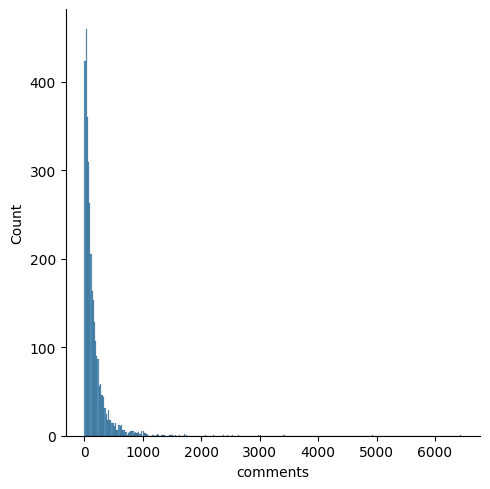

In [12]:
sns.displot(data['comments'])

**comment is a numerical variable<br>Replacing them with extreme values:0**

In [13]:
data['comments'].fillna(0,inplace=True)

**Handling NULL values for recorded_date**

In [14]:
data[data['recorded_date'].isnull()]

,talk_id,title,speaker_1,all_speakers,occupations,about_speakers,views,recorded_date,published_date,event,native_lang,available_lang,comments,duration,topics,related_talks,url,description,transcript
3831,56629,The unpaid work that GDP ignores -- and why it...,Marilyn Waring,{0: 'Marilyn Waring'},{0: ['economist']},{0: 'Marilyn Waring advocates for a public pol...,1276272,NaN,2020-01-23,TEDxChristchurch,en,"['en', 'es', 'fr', 'it', 'ko', 'pt', 'tr', 'vi...",20.0,1039,"['global development', 'development', 'social ...",{46582: 'Why governments should prioritize wel...,https://www.ted.com/talks/marilyn_waring_the_u...,"If you: do laundry, are (or have been) pregnan...",(In Maori: My mountain is Taupiri.) (Waikato i...


**Recorded_Date--only 1 such row with NULL value. So Deleting that row**

In [15]:
data=data[~data['recorded_date'].isnull()]

In [16]:
len(data[data['recorded_date'].isnull()])

0

# **Analysing Dependent Variable-Views**

In [17]:
data[data['views']==0]

,talk_id,title,speaker_1,all_speakers,occupations,about_speakers,views,recorded_date,published_date,event,native_lang,available_lang,comments,duration,topics,related_talks,url,description,transcript
2813,17850,Por qué necesitamos proteger el alta mar,Enric Sala,{0: 'Enric Sala'},{0: ['marine ecologist']},{0: 'Dr. Enric Sala is a former university pro...,0,2018-04-26,2018-06-06,TED en Español en NYC,es,"['en', 'es']",0.0,772,"['environment', 'economics', 'biosphere', 'nat...","{17733: ""Let's turn the high seas into the wor...",https://www.ted.com/talks/enric_sala_por_que_n...,Estamos pescando más rápido que la capacidad d...,If you randomly jumped in any point of the sea...
3056,29009,Cómo usar el arte de la fotografía para restau...,Alejandro Chaskielberg,{0: 'Alejandro Chaskielberg'},{0: ['photographer']},"{0: 'Alejandro Chaskielberg is a photographer,...",0,2018-11-05,2018-11-29,TEDxRiodelaPlata,es,"['en', 'es', 'pt']",0.0,862,"['art', 'photography', 'community', 'history',...",{2854: 'How your pictures can help reclaim los...,https://www.ted.com/talks/alejandro_chaskielbe...,¿Qué le puede suceder a la memoria cuando la e...,"Recently, my daughter and I decided to give aw..."
3068,29688,Por qué deberíamos comer más bichos,Renata di Tullio,{0: 'Renata di Tullio'},{0: ['técnica agropecuaria y agroalimentaria']},{0: 'Rena es Técnica Agropecuaria y Agroalimen...,0,2018-11-05,2018-12-07,TEDxRiodelaPlata,es,"['en', 'es', 'nl']",0.0,417,"['global issues', 'science', 'insects', 'food'...","{2427: 'The case for fish farming', 1018: 'Why...",https://www.ted.com/talks/renata_di_tullio_por...,"Have you ever considered crickets, houseflies ...",I'm passionate about insects for two reasons. ...
3520,43755,Can dogs sniff out malaria?,James Logan,{0: 'James Logan'},"{0: ['biologist', 'medical entomologist']}",{0: 'Professor James Logan leads an internatio...,0,2019-05-18,2019-06-11,TEDxLondon,en,"['en', 'pt-br', 'ru', 'zh-tw']",0.0,1099,"['health', 'public health', 'animals', 'smell'...",{1819: '3 reasons we still haven’t gotten rid ...,https://www.ted.com/talks/james_logan_can_dogs...,"Each year, hundreds of thousands of people aro...",Malaria is still one of the biggest killers on...
3790,55342,¿Como será el cine del futuro?,Diego Prilusky,{0: 'Diego Prilusky'},{0: ['productor audiovisual']},"{0: 'Diego viene del mundo de la producción, l...",0,2019-10-24,2019-12-19,TEDxRiodelaPlata,es,"['en', 'es', 'it']",0.0,743,"['technology', 'film', 'movies', 'entertainmen...","{1476: 'The shared wonder of film', 403: ""A to...",https://www.ted.com/talks/diego_prilusky_como_...,"Desde las películas western, hasta las cintas ...",The art of movies has existed for more than 10...
4004,62794,The most important anus in the ocean,Cella Wright,{0: 'Cella Wright'},{0: 'Other'},NA,0,2020-04-30,2020-04-30,TED-Ed,en,['en'],0.0,281,"['animals', 'TED-Ed', 'animation', 'oceans', '...","{62347: 'The bug that poops candy', 29159: 'In...",https://www.ted.com/talks/cella_wright_the_mos...,Is it a fuzzy sock? An overripe banana? A mold...,Can you guess what you’re looking at? Is it a ...


**Only 6 rows with views 0 which is abnormal data . So removing such rows**

In [18]:
data=data[data['views']>0]

<Axes: xlabel='views', ylabel='Count'>

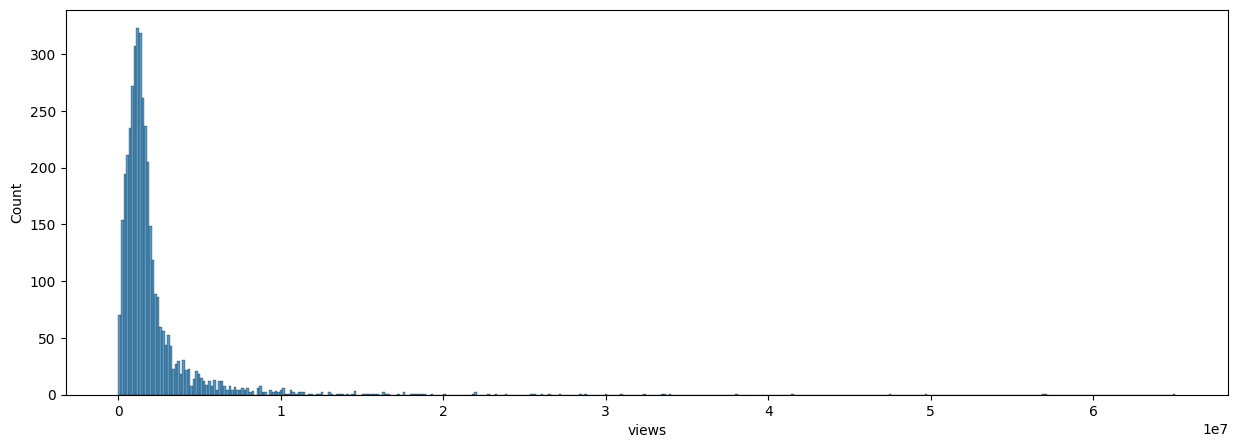

In [19]:
plt.figure(figsize=(15,5))
sns.histplot(data['views'])


**As there is date related columns . A better judge of views of a video will be daily views of a video(views/days since published)**

In [20]:
data['recorded_date']=pd.to_datetime(data['recorded_date'])
data['published_date']=pd.to_datetime(data['published_date'])

In [21]:
last_possible_date=data['published_date'].max()

In [22]:
last_possible_date

Timestamp('2020-04-30 00:00:00')

**Creating New column to store days since video is publlished**

In [23]:
data['time_since_published']=last_possible_date-data['published_date']

**Created New columns to check daily views for a video as it is better metric**

In [24]:
data['daily_views']=data['views']/data['time_since_published'].apply(lambda x: x.days+1)

# **Analyzing Independent-Numerical variables**

Numerical variables<br>
1)talk_id--It is just a identifier. Hence removing it<br>
2)comments<br>
3)duration<br> 

In [25]:
data=data.drop('talk_id',axis=1)

### **Analyzing -Comments**

In [26]:
data['comments'].describe()

count    3998.000000
mean      135.735368
std       253.225922
min         0.000000
25%        17.000000
50%        68.000000
75%       162.750000
max      6449.000000
Name: comments, dtype: float64

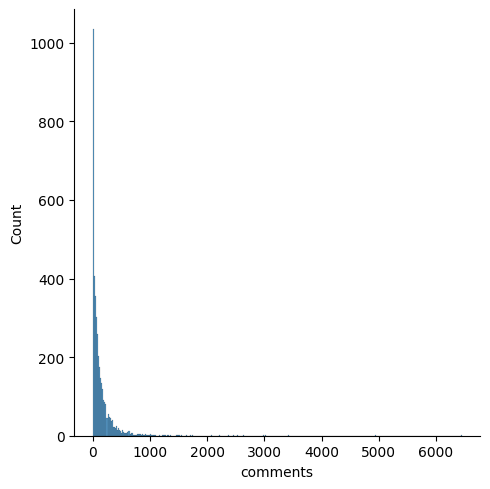

In [27]:
sns.displot(data['comments'])

**Large number of videos has 0 comments. Part of which can be due to comments beind disbaled in some videos**

<Axes: xlabel='comments'>

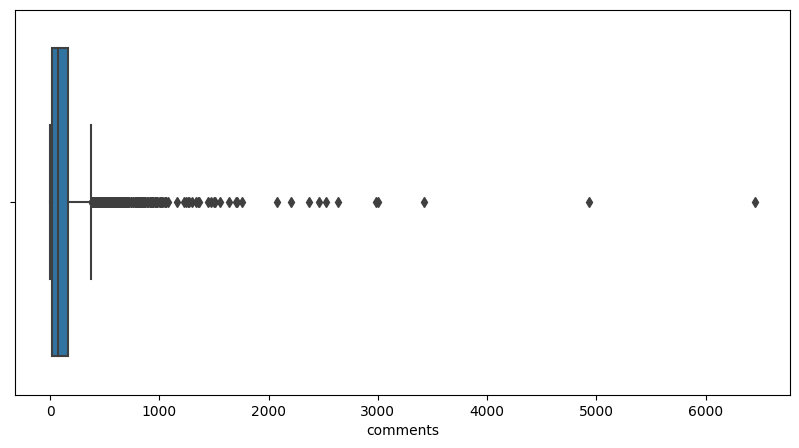

In [28]:
plt.subplots(figsize=(10,5))
sns.boxplot(x='comments',data=data)

In [29]:
len(data[data['comments']<400])

3719

<Axes: xlabel='comments', ylabel='views'>

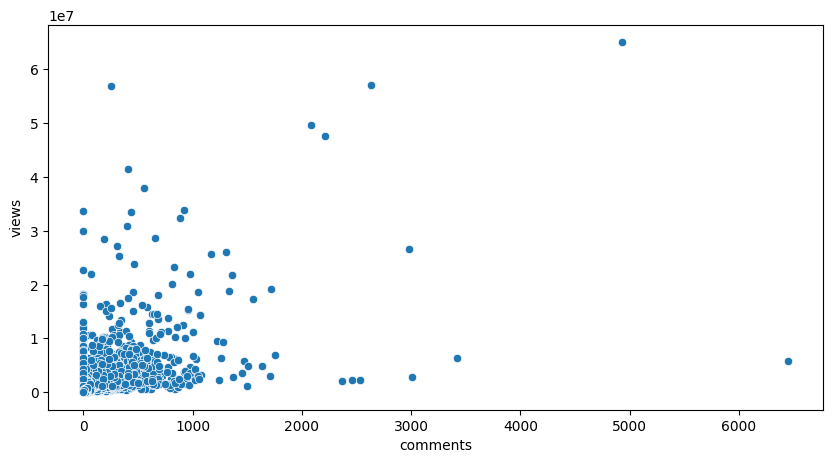

In [30]:
plt.subplots(figsize=(10,5))
sns.scatterplot(x='comments',y='views',data=data)

**Coniserable number of outlier data is present. Hence treating outliers with median**

In [31]:
values=data.comments.quantile([0.25,0.75])
print(values)
iqr=values.values[1]-values.values[0]
min_limit=values.values[0]-1.5*iqr
max_limit=values.values[1]+1.5*iqr
data['comments']=data['comments'].apply(lambda x: x if x>min_limit and x<max_limit else data['comments'].median())

0.25     17.00
0.75    162.75
Name: comments, dtype: float64


<Axes: xlabel='comments'>

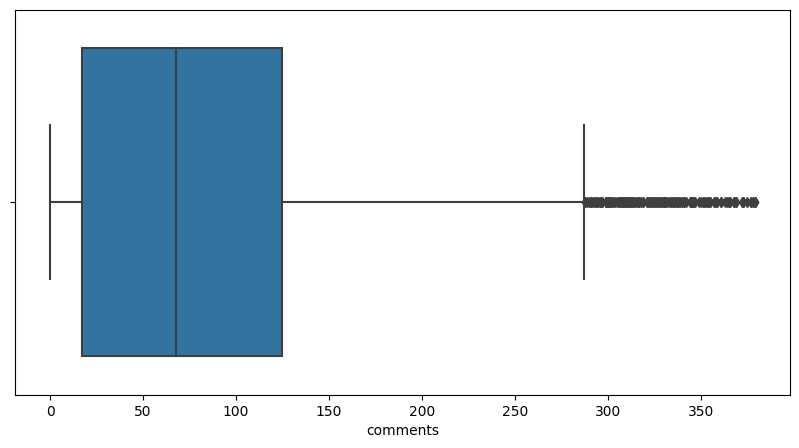

In [32]:
plt.subplots(figsize=(10,5))
sns.boxplot(x='comments',data=data)

<Axes: xlabel='comments', ylabel='views'>

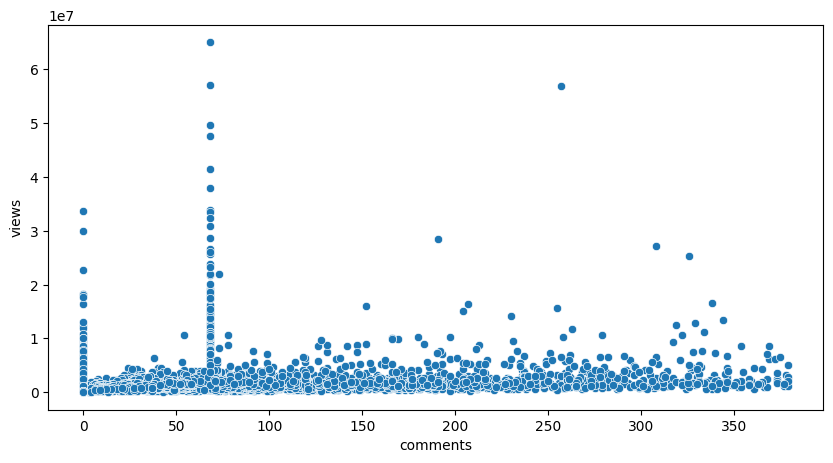

In [33]:
sns.scatterplot(x='comments',y='views',data=data)

<Axes: xlabel='comments', ylabel='daily_views'>

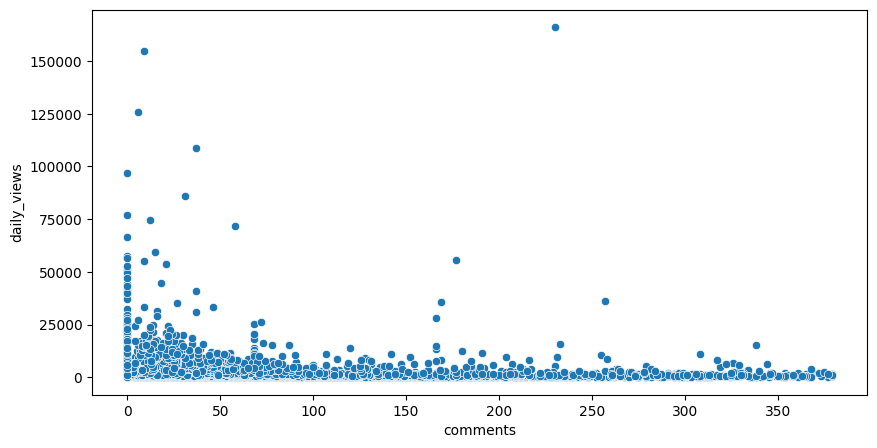

In [34]:
sns.scatterplot(x='comments',y='daily_views',data=data)

**Very less but little correlation between comments and views/daily views**

# **Analyzing Duration**

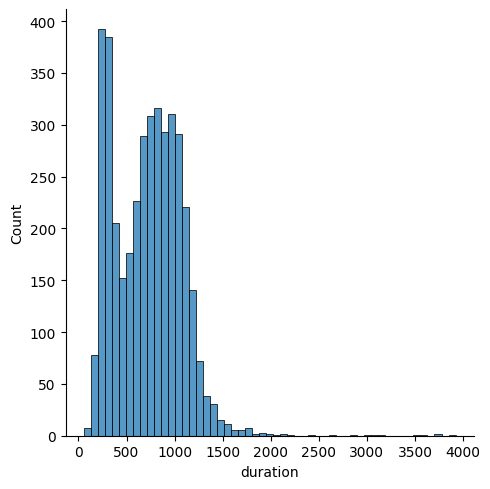

In [35]:
sns.displot(data['duration'])

<Axes: xlabel='duration'>

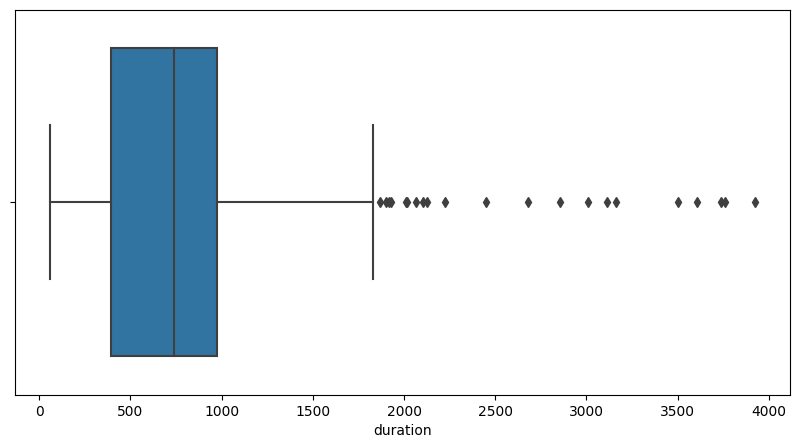

In [36]:
plt.subplots(figsize=(10,5))
sns.boxplot(x='duration',data=data)

**Considerable number of outliers are present . Hence replacing them with median**

In [37]:
values=data.duration.quantile([0.25,0.75])
print(values)
iqr=values.values[1]-values.values[0]
min_limit=values.values[0]-1.5*iqr
max_limit=values.values[1]+1.5*iqr
data['duration']=data['duration'].apply(lambda x: x if x>min_limit and x<max_limit else data['duration'].median())

0.25    392.25
0.75    973.75
Name: duration, dtype: float64


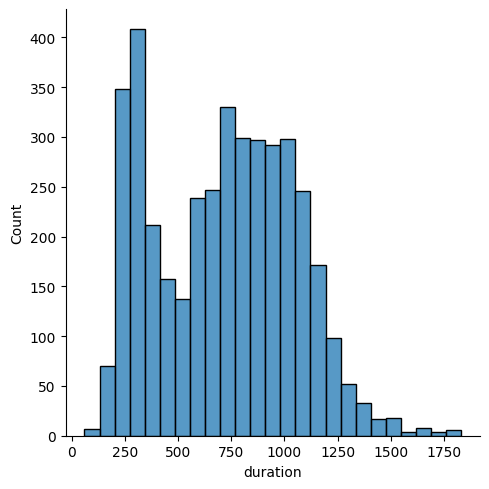

In [38]:
sns.displot(data['duration'])

<Axes: xlabel='duration'>

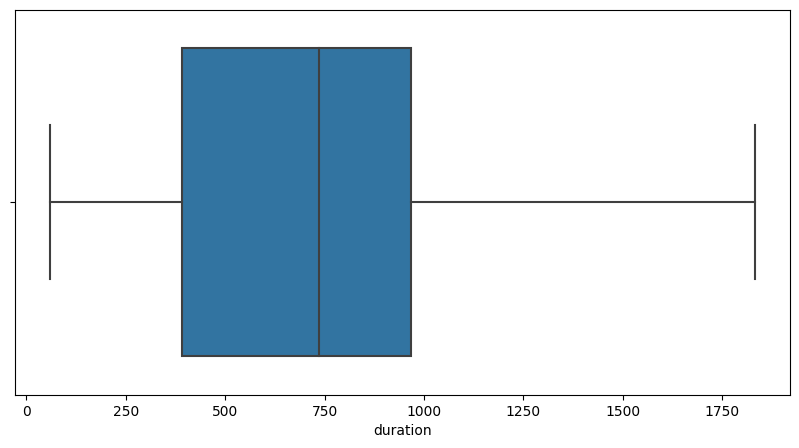

In [39]:
plt.subplots(figsize=(10,5))
sns.boxplot(x='duration',data=data)

<Axes: xlabel='duration', ylabel='views'>

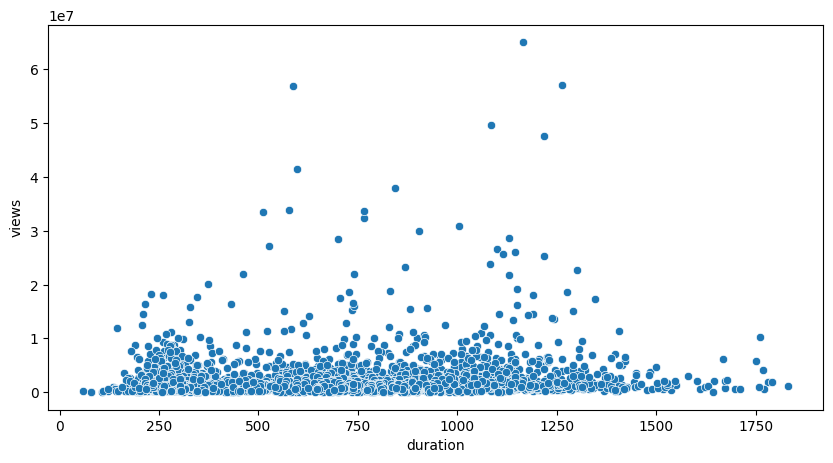

In [40]:
plt.subplots(figsize=(10,5))
sns.scatterplot(x='duration',y='views',data=data)

<Axes: xlabel='duration', ylabel='daily_views'>

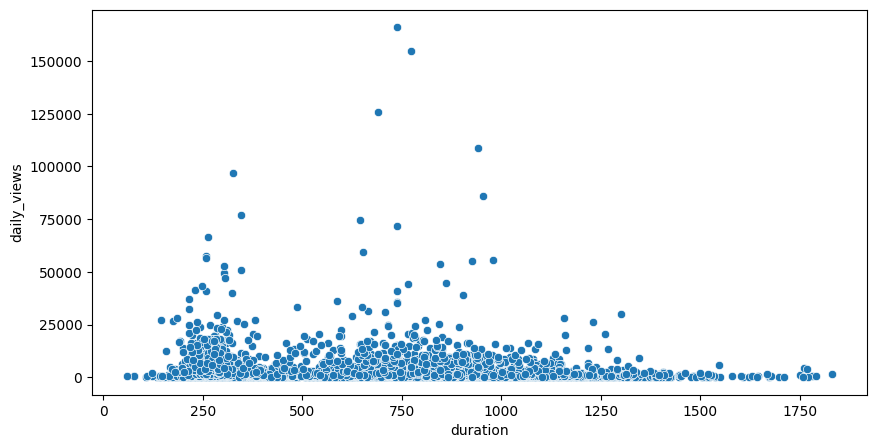

In [41]:
plt.subplots(figsize=(10,5))
sns.scatterplot(x='duration',y='daily_views',data=data)

**Very Little correlation between duration and views/daily views**

# **Analysing Categorical Variable**

##**Categorical Variables:**<br>
**title**<br>
**speaker_1**<br>
**all_speakers**<br>
**occupations**<br>
**about_speakers**<br>
**recorded_date**<br>
**published_date**<br>
**event**<br>
**native_lang**<br>
**available_lang**<br>
**comments**<br>
**topics**<br>
**related_talks**<br>
**url**<br>
**description**<br>
**transcript**

In [42]:
data.head(5)

,title,speaker_1,all_speakers,occupations,about_speakers,views,recorded_date,published_date,event,native_lang,available_lang,comments,duration,topics,related_talks,url,description,transcript,time_since_published,daily_views
0,Averting the climate crisis,Al Gore,{0: 'Al Gore'},{0: ['climate advocate']},{0: 'Nobel Laureate Al Gore focused the world’...,3523392,2006-02-25,2006-06-27,TED2006,en,"['ar', 'bg', 'cs', 'de', 'el', 'en', 'es', 'fa...",272.0,977.0,"['alternative energy', 'cars', 'climate change...","{243: 'New thinking on the climate crisis', 54...",https://www.ted.com/talks/al_gore_averting_the...,With the same humor and humanity he exuded in ...,"Thank you so much, Chris. And it's truly a gre...",5056 days,696.735614
1,The best stats you've ever seen,Hans Rosling,{0: 'Hans Rosling'},{0: ['global health expert; data visionary']},"{0: 'In Hans Rosling’s hands, data sings. Glob...",14501685,2006-02-22,2006-06-27,TED2006,en,"['ar', 'az', 'bg', 'bn', 'bs', 'cs', 'da', 'de...",68.0,1190.0,"['Africa', 'Asia', 'Google', 'demo', 'economic...","{2056: ""Own your body's data"", 2296: 'A visual...",https://www.ted.com/talks/hans_rosling_the_bes...,You've never seen data presented like this. Wi...,"About 10 years ago, I took on the task to teac...",5056 days,2867.645837
2,Simplicity sells,David Pogue,{0: 'David Pogue'},{0: ['technology columnist']},{0: 'David Pogue is the personal technology co...,1920832,2006-02-24,2006-06-27,TED2006,en,"['ar', 'bg', 'de', 'el', 'en', 'es', 'fa', 'fr...",124.0,1286.0,"['computers', 'entertainment', 'interface desi...","{1725: '10 top time-saving tech tips', 2274: '...",https://www.ted.com/talks/david_pogue_simplici...,New York Times columnist David Pogue takes aim...,"(Music: ""The Sound of Silence,"" Simon & Garfun...",5056 days,379.836267
3,Greening the ghetto,Majora Carter,{0: 'Majora Carter'},{0: ['activist for environmental justice']},{0: 'Majora Carter redefined the field of envi...,2664069,2006-02-26,2006-06-27,TED2006,en,"['ar', 'bg', 'bn', 'ca', 'cs', 'de', 'en', 'es...",219.0,1116.0,"['MacArthur grant', 'activism', 'business', 'c...",{1041: '3 stories of local eco-entrepreneurshi...,https://www.ted.com/talks/majora_carter_greeni...,"In an emotionally charged talk, MacArthur-winn...",If you're here today — and I'm very happy that...,5056 days,526.808187
4,Do schools kill creativity?,Sir Ken Robinson,{0: 'Sir Ken Robinson'},"{0: ['author', 'educator']}","{0: ""Creativity expert Sir Ken Robinson challe...",65051954,2006-02-25,2006-06-27,TED2006,en,"['af', 'ar', 'az', 'be', 'bg', 'bn', 'ca', 'cs...",68.0,1164.0,"['children', 'creativity', 'culture', 'dance',...","{865: 'Bring on the learning revolution!', 173...",https://www.ted.com/talks/sir_ken_robinson_do_...,Sir Ken Robinson makes an entertaining and pro...,Good morning. How are you? (Audience) Good. It...,5056 days,12863.744117


Following columns ared dropped as they are useless<br>

1)url<br>
2)transcript<br>
3)title<br>
4)description<br>
5)all_speakers<br>
6)about_speakers<br>

In [43]:
#url,transcript--useless we can drop

In [44]:
data=data.drop(['url','transcript','title','description','all_speakers','about_speakers',],axis=1)

In [45]:
data.head(5)

,speaker_1,occupations,views,recorded_date,published_date,event,native_lang,available_lang,comments,duration,topics,related_talks,time_since_published,daily_views
0,Al Gore,{0: ['climate advocate']},3523392,2006-02-25,2006-06-27,TED2006,en,"['ar', 'bg', 'cs', 'de', 'el', 'en', 'es', 'fa...",272.0,977.0,"['alternative energy', 'cars', 'climate change...","{243: 'New thinking on the climate crisis', 54...",5056 days,696.735614
1,Hans Rosling,{0: ['global health expert; data visionary']},14501685,2006-02-22,2006-06-27,TED2006,en,"['ar', 'az', 'bg', 'bn', 'bs', 'cs', 'da', 'de...",68.0,1190.0,"['Africa', 'Asia', 'Google', 'demo', 'economic...","{2056: ""Own your body's data"", 2296: 'A visual...",5056 days,2867.645837
2,David Pogue,{0: ['technology columnist']},1920832,2006-02-24,2006-06-27,TED2006,en,"['ar', 'bg', 'de', 'el', 'en', 'es', 'fa', 'fr...",124.0,1286.0,"['computers', 'entertainment', 'interface desi...","{1725: '10 top time-saving tech tips', 2274: '...",5056 days,379.836267
3,Majora Carter,{0: ['activist for environmental justice']},2664069,2006-02-26,2006-06-27,TED2006,en,"['ar', 'bg', 'bn', 'ca', 'cs', 'de', 'en', 'es...",219.0,1116.0,"['MacArthur grant', 'activism', 'business', 'c...",{1041: '3 stories of local eco-entrepreneurshi...,5056 days,526.808187
4,Sir Ken Robinson,"{0: ['author', 'educator']}",65051954,2006-02-25,2006-06-27,TED2006,en,"['af', 'ar', 'az', 'be', 'bg', 'bn', 'ca', 'cs...",68.0,1164.0,"['children', 'creativity', 'culture', 'dance',...","{865: 'Bring on the learning revolution!', 173...",5056 days,12863.744117


# **Analyzing Speaker_1**

In [46]:
df1=data['speaker_1'].value_counts().reset_index()

In [47]:
#This are the top 10 speakers on the basis of how many times they have spoken in a TED event

In [48]:
df1=df1.head(10)

Text(0.5, 1.0, 'Top 10 Speakers with most no of TED Talks')

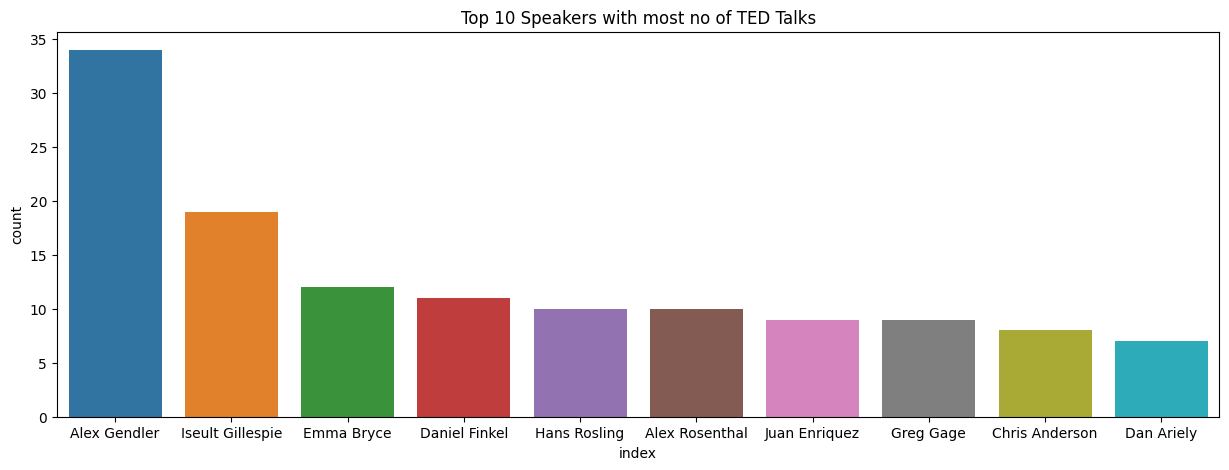

In [49]:
plt.subplots(figsize=(15,5))
sns.barplot(x='index',y='speaker_1',data=df1)
plt.ylabel('count')
plt.title('Top 10 Speakers with most no of TED Talks')


**This are the top 10 speakers on the basis of how many times they have spoken in TED events. Alex Gendler has the highest number of TED talks**

Text(0.5, 1.0, 'Top 10 speakers with median daily views')

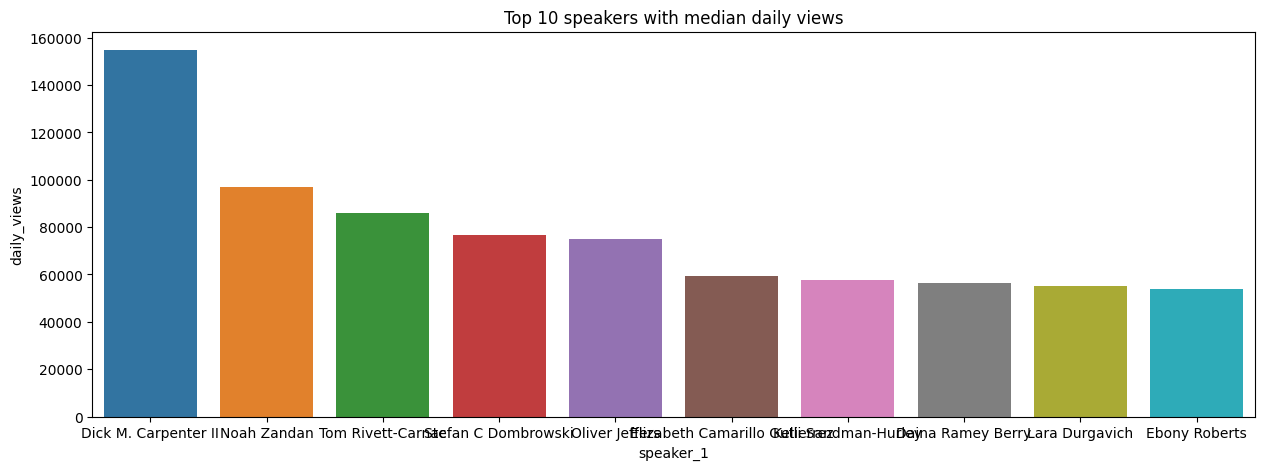

In [50]:
plt.subplots(figsize=(15,5))
df1=data.groupby('speaker_1')['daily_views'].median().nlargest(10).reset_index()
ax=sns.barplot(x='speaker_1',y='daily_views',data=df1)
plt.title("Top 10 speakers with median daily views")


Text(0.5, 1.0, 'Top 10 speakers with average daily views')

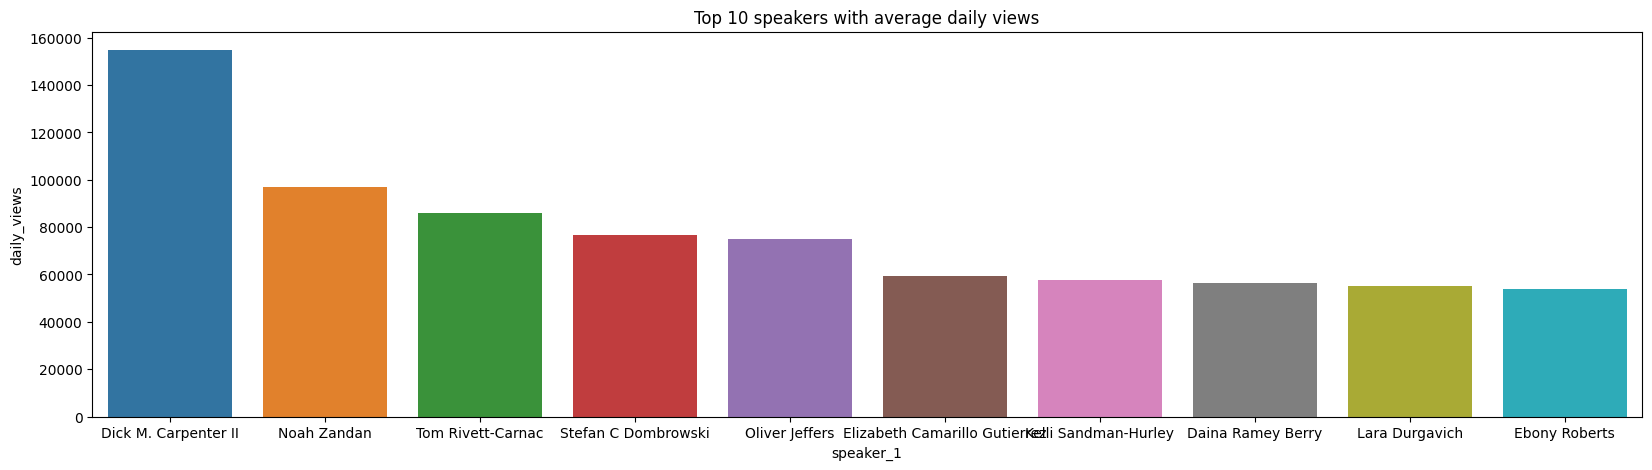

In [51]:
plt.subplots(figsize=(20,5))
df2=data.groupby('speaker_1')['daily_views'].mean().nlargest(10).reset_index()
sns.barplot(x='speaker_1',y='daily_views',data=df2)
plt.title("Top 10 speakers with average daily views")

**top 10 speakers on the basis of average number of views of each TED Talks. Dick M. Carpenter II has highest average daily views**

In [52]:
df2=data.groupby('speaker_1')['daily_views'].mean()
df2=df2.to_dict()
data['avg_speaker_1_views']=data['speaker_1'].map(df2)

**Created a new column called speaker_1_avg_views to map average daily views of a speaker. Creating a dictionary of speaker1 and corresponding avg daily views and using the map function**

# **Analysing the date columns-recorded_date and published_date**

**Creating columns of day_of_month,month,day_name,day_of_week(weekend or not)**

In [53]:
data['day']=data['published_date'].dt.day
data['month']=data['published_date'].dt.month
data['day_name']=data['published_date'].dt.day_name()
data['year']=data['published_date'].dt.year

#for weekend value is 1 else 0;
data['is_weekend']=data['published_date'].dt.day_of_week
data['is_weekend']=data['is_weekend'].apply(lambda x: 1 if x>=5 else 0)

In [54]:
data.head()

,speaker_1,occupations,views,recorded_date,published_date,event,native_lang,available_lang,comments,duration,topics,related_talks,time_since_published,daily_views,avg_speaker_1_views,day,month,day_name,year,is_weekend
0,Al Gore,{0: ['climate advocate']},3523392,2006-02-25,2006-06-27,TED2006,en,"['ar', 'bg', 'cs', 'de', 'el', 'en', 'es', 'fa...",272.0,977.0,"['alternative energy', 'cars', 'climate change...","{243: 'New thinking on the climate crisis', 54...",5056 days,696.735614,699.725014,27,6,Tuesday,2006,0
1,Hans Rosling,{0: ['global health expert; data visionary']},14501685,2006-02-22,2006-06-27,TED2006,en,"['ar', 'az', 'bg', 'bn', 'bs', 'cs', 'da', 'de...",68.0,1190.0,"['Africa', 'Asia', 'Google', 'demo', 'economic...","{2056: ""Own your body's data"", 2296: 'A visual...",5056 days,2867.645837,1098.925286,27,6,Tuesday,2006,0
2,David Pogue,{0: ['technology columnist']},1920832,2006-02-24,2006-06-27,TED2006,en,"['ar', 'bg', 'de', 'el', 'en', 'es', 'fa', 'fr...",124.0,1286.0,"['computers', 'entertainment', 'interface desi...","{1725: '10 top time-saving tech tips', 2274: '...",5056 days,379.836267,687.917181,27,6,Tuesday,2006,0
3,Majora Carter,{0: ['activist for environmental justice']},2664069,2006-02-26,2006-06-27,TED2006,en,"['ar', 'bg', 'bn', 'ca', 'cs', 'de', 'en', 'es...",219.0,1116.0,"['MacArthur grant', 'activism', 'business', 'c...",{1041: '3 stories of local eco-entrepreneurshi...,5056 days,526.808187,452.806229,27,6,Tuesday,2006,0
4,Sir Ken Robinson,"{0: ['author', 'educator']}",65051954,2006-02-25,2006-06-27,TED2006,en,"['af', 'ar', 'az', 'be', 'bg', 'bn', 'ca', 'cs...",68.0,1164.0,"['children', 'creativity', 'culture', 'dance',...","{865: 'Bring on the learning revolution!', 173...",5056 days,12863.744117,6453.203121,27,6,Tuesday,2006,0


Text(0, 0.5, 'no of ted talks')

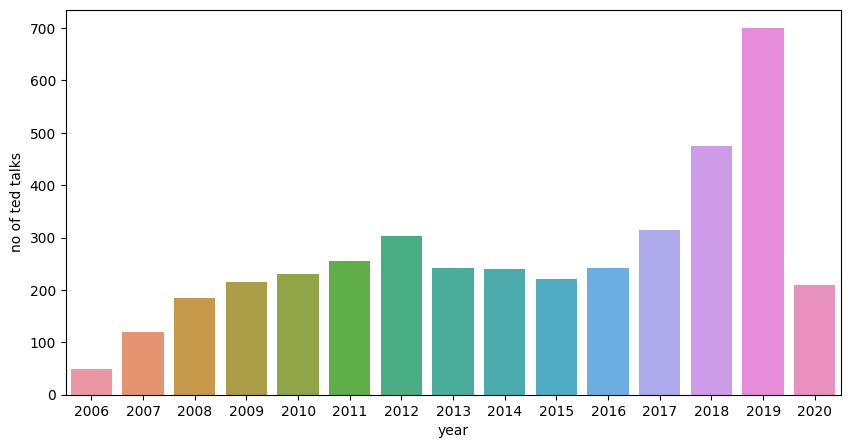

In [55]:
df1=data.groupby('year')['daily_views'].count().reset_index()
sns.barplot(x='year',y='daily_views',data=df1)
plt.ylabel('no of ted talks')

**Highest no of TED talk events have occured in 2019**

<Axes: xlabel='year', ylabel='daily_views'>

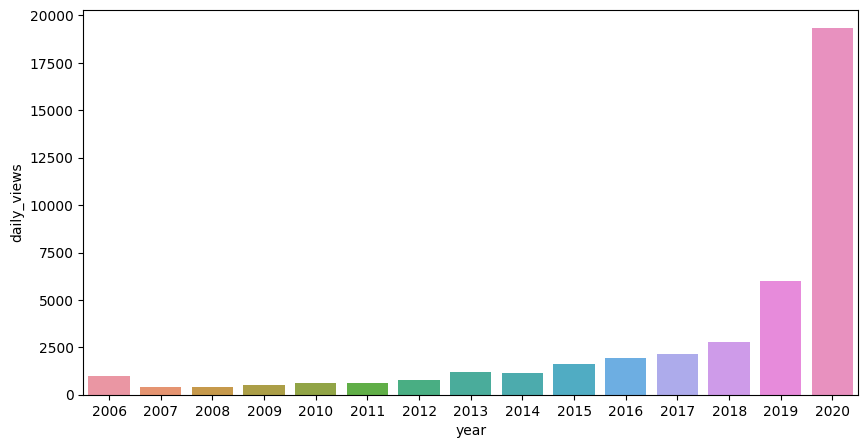

In [56]:
df1=data.groupby('year')['daily_views'].mean().reset_index()
sns.barplot(x='year',y='daily_views',data=df1)

**So steady avg increase in daily views over the years and huge growth in 2024(as data less for that year or COVID)**

<Axes: xlabel='year', ylabel='views'>

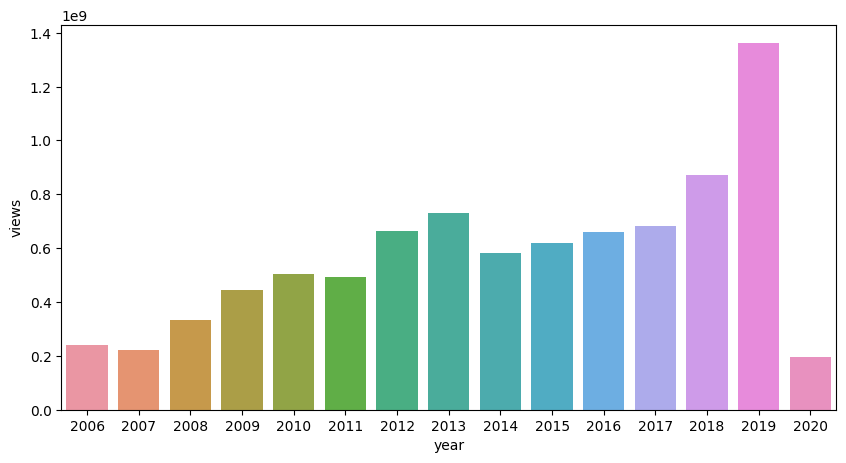

In [57]:
df1=data.groupby('year')['views'].sum().reset_index()
sns.barplot(x='year',y='views',data=df1)

**Most total views of video is in year 2019. Probably due to more viedos released in 2019**

<Axes: xlabel='month', ylabel='daily_views'>

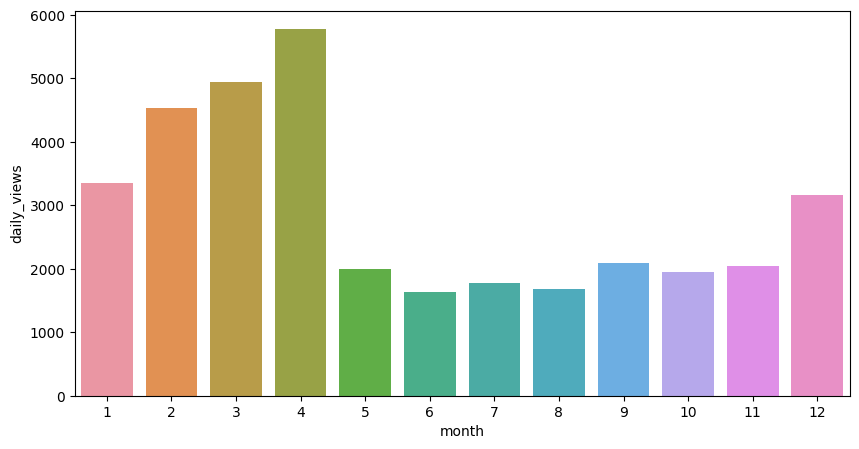

In [58]:
df1=data.groupby('month')['daily_views'].mean().reset_index()
sns.barplot(x='month',y='daily_views',data=df1)

**Daily views are the highest for the first 4 months and then reducing . may be due to summer season**

<Axes: xlabel='month', ylabel='views'>

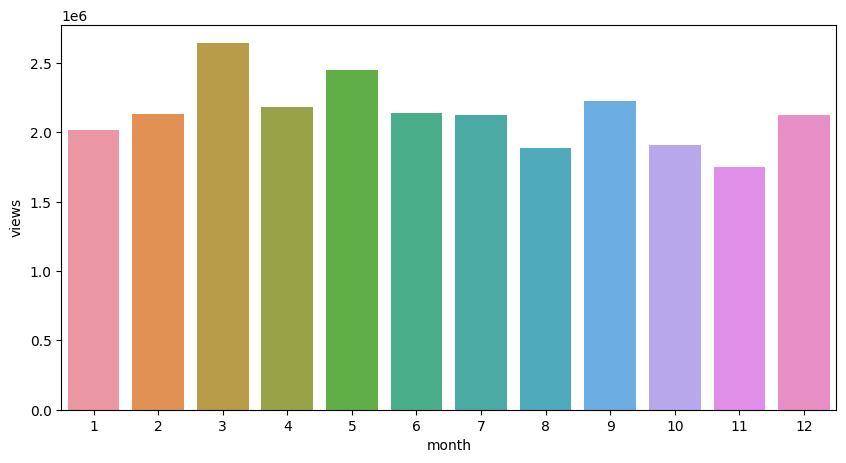

In [59]:
df1=data.groupby('month')['views'].mean().reset_index()
sns.barplot(x='month',y='views',data=df1)

<Axes: xlabel='day', ylabel='daily_views'>

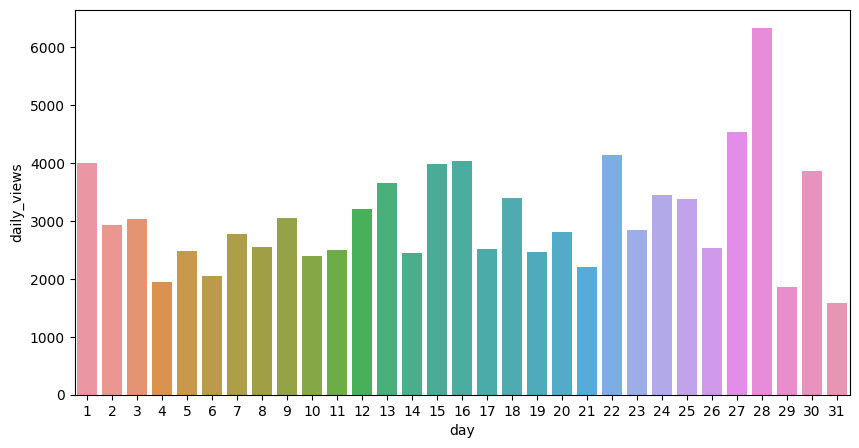

In [60]:
df1=data.groupby('day')['daily_views'].mean().reset_index()
sns.barplot(x='day',y='daily_views',data=df1)

<Axes: xlabel='day', ylabel='views'>

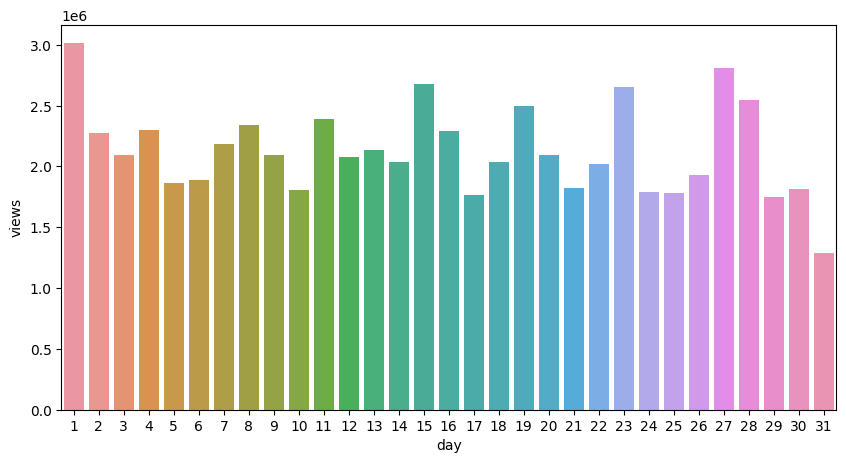

In [61]:
df1=data.groupby('day')['views'].mean().reset_index()
sns.barplot(x='day',y='views',data=df1)

**Last of the month videos released are having lesset views. Also variation in weeekend is there**

<Axes: xlabel='is_weekend', ylabel='daily_views'>

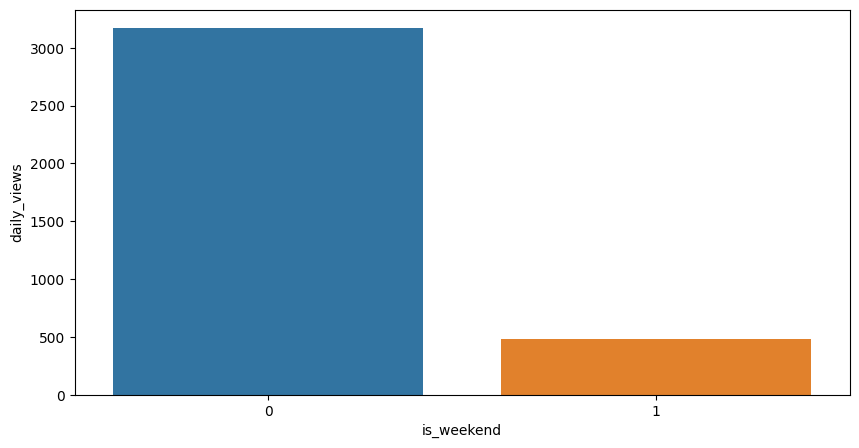

In [62]:
df1=data.groupby('is_weekend')['daily_views'].mean().reset_index()
sns.barplot(x='is_weekend',y='daily_views',data=df1)

<Axes: xlabel='is_weekend', ylabel='views'>

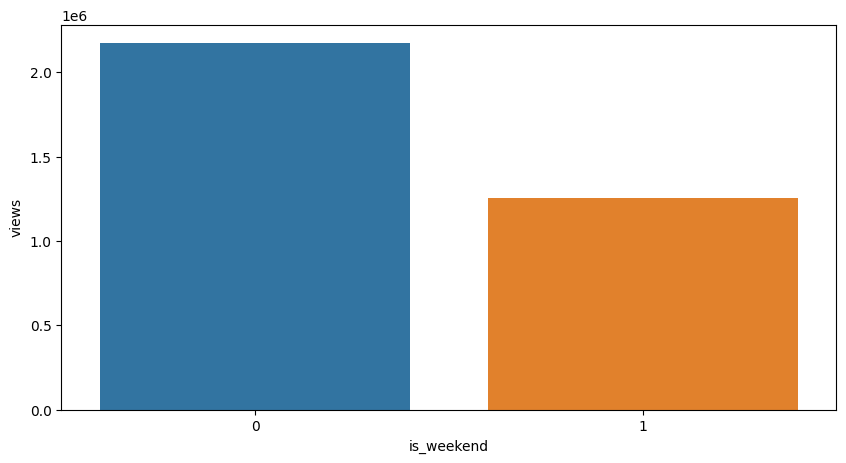

In [63]:
df1=data.groupby('is_weekend')['views'].mean().reset_index()
sns.barplot(x='is_weekend',y='views',data=df1)

**Ted Talks released in weekdays have higher views compared to weekends**

In [64]:
data['time_since_published'] = data['time_since_published'].dt.days

**Changing column type to int from datetime**

<Axes: xlabel='time_since_published', ylabel='views'>

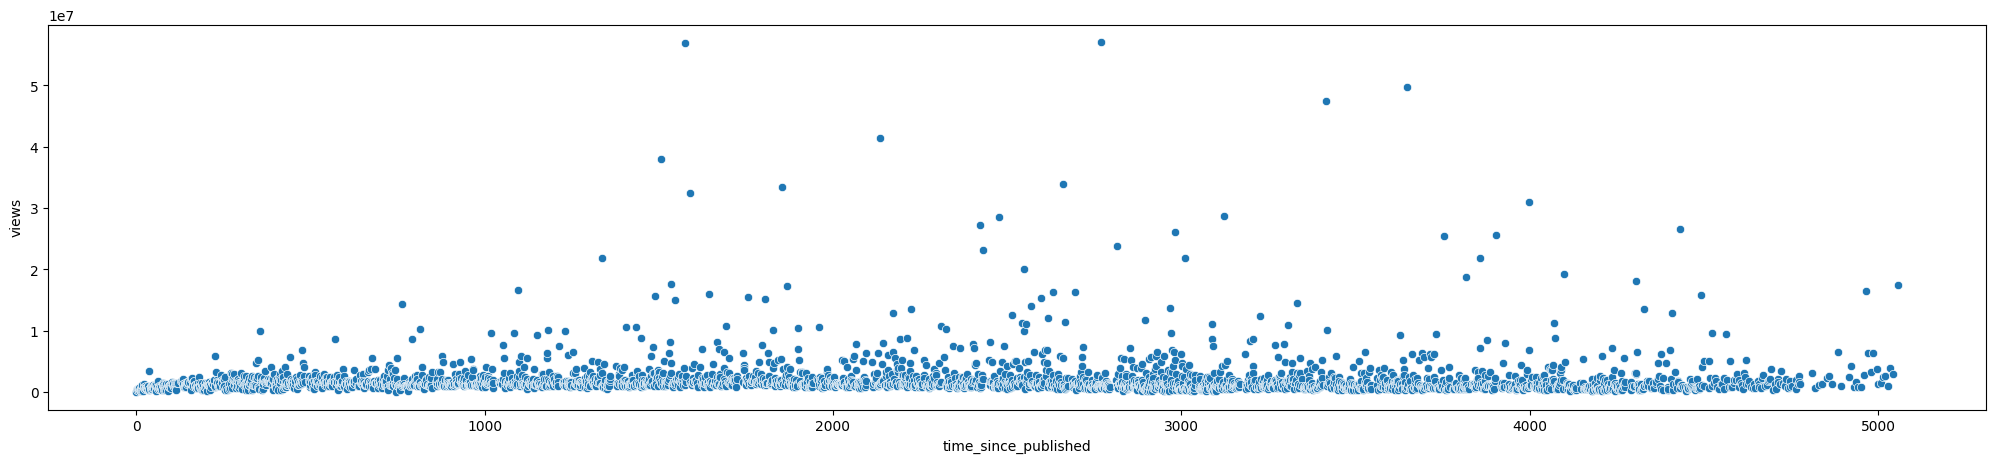

In [65]:
plt.subplots(figsize=(25,5))
df1=data.groupby('time_since_published')['views'].mean().reset_index()
sns.scatterplot(x='time_since_published',y='views',data=df1)

<Axes: xlabel='time_since_published', ylabel='daily_views'>

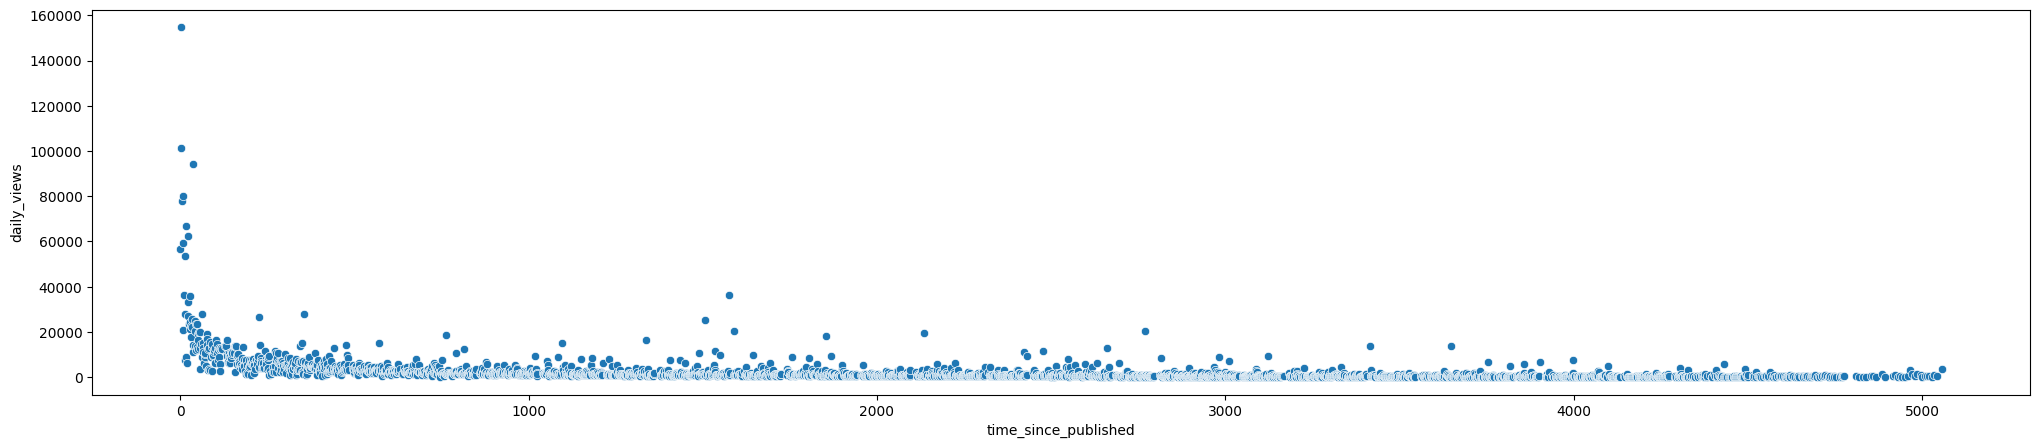

In [66]:
plt.subplots(figsize=(25,5))
df1=data.groupby('time_since_published')['daily_views'].mean().reset_index()
sns.scatterplot(x='time_since_published',y='daily_views',data=df1)

**Daily views are more recently released video talk**

# **Analysing Language**

In [67]:
data['native_lang'].value_counts()

en       3954
es         23
fr          9
ja          3
hi          2
de          1
pt          1
ko          1
zh-cn       1
ar          1
pt-br       1
it          1
Name: native_lang, dtype: int64

**More than90% are in english . No point of keeping this column so dropping it**

In [68]:
data=data.drop('native_lang',axis=1)

#**Analysing Available Language**

In [69]:
data['available_lang'].head(5)

0    ['ar', 'bg', 'cs', 'de', 'el', 'en', 'es', 'fa...
1    ['ar', 'az', 'bg', 'bn', 'bs', 'cs', 'da', 'de...
2    ['ar', 'bg', 'de', 'el', 'en', 'es', 'fa', 'fr...
3    ['ar', 'bg', 'bn', 'ca', 'cs', 'de', 'en', 'es...
4    ['af', 'ar', 'az', 'be', 'bg', 'bn', 'ca', 'cs...
Name: available_lang, dtype: object

In [70]:
def a1_count(x):    
    x=x.replace('[','')
    x=x.replace(']','')
    x=x.replace("'","")
    x=x.split(",")
    return len(x)


In [71]:
data['available_lang_count']=data['available_lang'].apply(lambda x: a1_count(x))

**Created new column to have count of available languages for a video**

In [72]:
data.head(5)

,speaker_1,occupations,views,recorded_date,published_date,event,available_lang,comments,duration,topics,related_talks,time_since_published,daily_views,avg_speaker_1_views,day,month,day_name,year,is_weekend,available_lang_count
0,Al Gore,{0: ['climate advocate']},3523392,2006-02-25,2006-06-27,TED2006,"['ar', 'bg', 'cs', 'de', 'el', 'en', 'es', 'fa...",272.0,977.0,"['alternative energy', 'cars', 'climate change...","{243: 'New thinking on the climate crisis', 54...",5056,696.735614,699.725014,27,6,Tuesday,2006,0,43
1,Hans Rosling,{0: ['global health expert; data visionary']},14501685,2006-02-22,2006-06-27,TED2006,"['ar', 'az', 'bg', 'bn', 'bs', 'cs', 'da', 'de...",68.0,1190.0,"['Africa', 'Asia', 'Google', 'demo', 'economic...","{2056: ""Own your body's data"", 2296: 'A visual...",5056,2867.645837,1098.925286,27,6,Tuesday,2006,0,49
2,David Pogue,{0: ['technology columnist']},1920832,2006-02-24,2006-06-27,TED2006,"['ar', 'bg', 'de', 'el', 'en', 'es', 'fa', 'fr...",124.0,1286.0,"['computers', 'entertainment', 'interface desi...","{1725: '10 top time-saving tech tips', 2274: '...",5056,379.836267,687.917181,27,6,Tuesday,2006,0,26
3,Majora Carter,{0: ['activist for environmental justice']},2664069,2006-02-26,2006-06-27,TED2006,"['ar', 'bg', 'bn', 'ca', 'cs', 'de', 'en', 'es...",219.0,1116.0,"['MacArthur grant', 'activism', 'business', 'c...",{1041: '3 stories of local eco-entrepreneurshi...,5056,526.808187,452.806229,27,6,Tuesday,2006,0,35
4,Sir Ken Robinson,"{0: ['author', 'educator']}",65051954,2006-02-25,2006-06-27,TED2006,"['af', 'ar', 'az', 'be', 'bg', 'bn', 'ca', 'cs...",68.0,1164.0,"['children', 'creativity', 'culture', 'dance',...","{865: 'Bring on the learning revolution!', 173...",5056,12863.744117,6453.203121,27,6,Tuesday,2006,0,62


<Axes: xlabel='available_lang_count', ylabel='views'>

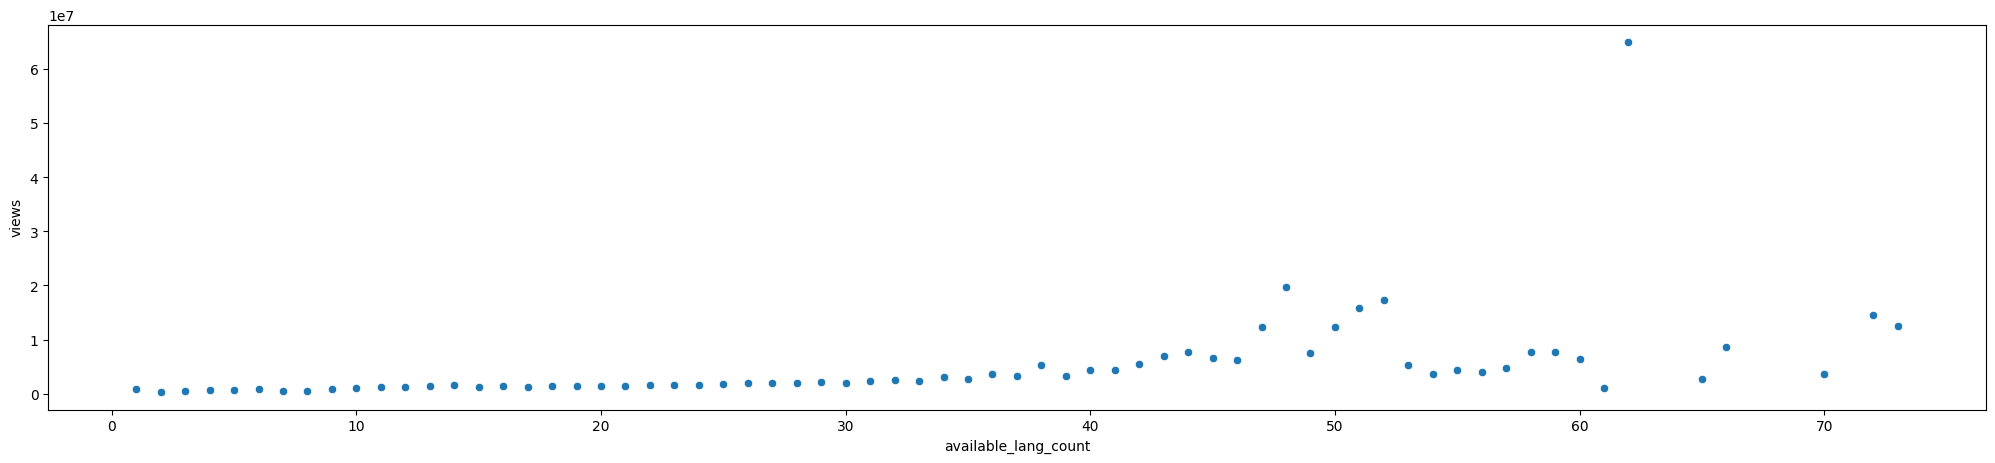

In [73]:
plt.subplots(figsize=(25,5))
df8=data.groupby('available_lang_count')['views'].mean().reset_index()
sns.scatterplot(x='available_lang_count',y='views',data=df8)

**can conclude that available_lang_count if more then view is more. Linear relation slight**

# **Analysing-Topics**

In [74]:
data['topics'][0]

"['alternative energy', 'cars', 'climate change', 'culture', 'environment', 'global issues', 'science', 'sustainability', 'technology']"

In [75]:

def topic_count(x):    
    x=x.replace('[','')
    x=x.replace(']','')
    x=x.replace("'","")
    x=x.split(",")
    return len(x)


In [76]:
data['topics_count']=data['topics'].apply(lambda x: topic_count(x))

**Create a new column to store no op topics present in a video**

<Axes: xlabel='topics_count', ylabel='views'>

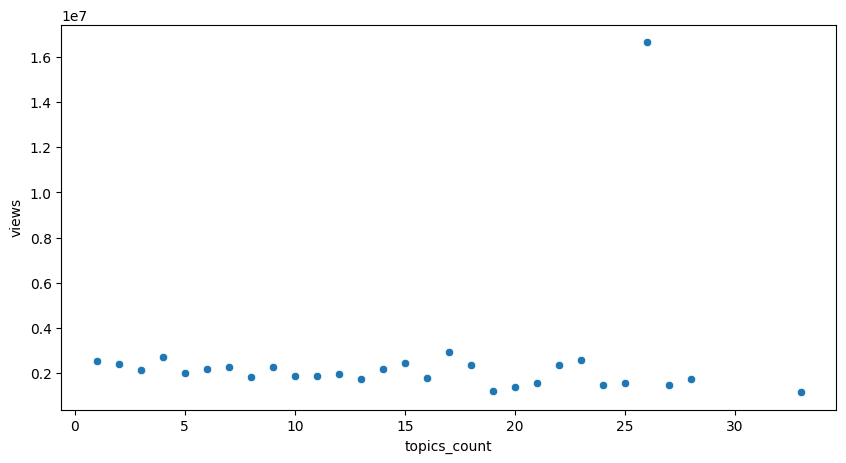

In [77]:
df1=data.groupby('topics_count')['views'].mean().reset_index()
sns.scatterplot(x='topics_count',y='views',data=df1)

In [78]:
# Very scattered but little  indication of relation between no of topics available and views

In [79]:
def dict_topics(x):
    d_topic={}
    for i in x:
        i=i.replace("[","")
        i=i.replace("]","")
        i=i.replace("'","")
        i=i.split(",")
        for j in i:
            if( j not in d_topic):
                d_topic[j]=1
            else:
                d_topic[j]=d_topic[j]+1   
    keys=list(d_topic.keys())
    values=list(d_topic.values())
    sorted_value_index=np.argsort(values)
    sorted_d_topic={keys[i]:values[i] for i in sorted_value_index}             
    return sorted_d_topic

In [80]:
d_topic=dict_topics(data['topics'])

In [81]:
d_topic=pd.DataFrame(d_topic.items(),columns=['topics','count'])

In [82]:
d1=d_topic.tail(10)

<Axes: xlabel='topics', ylabel='count'>

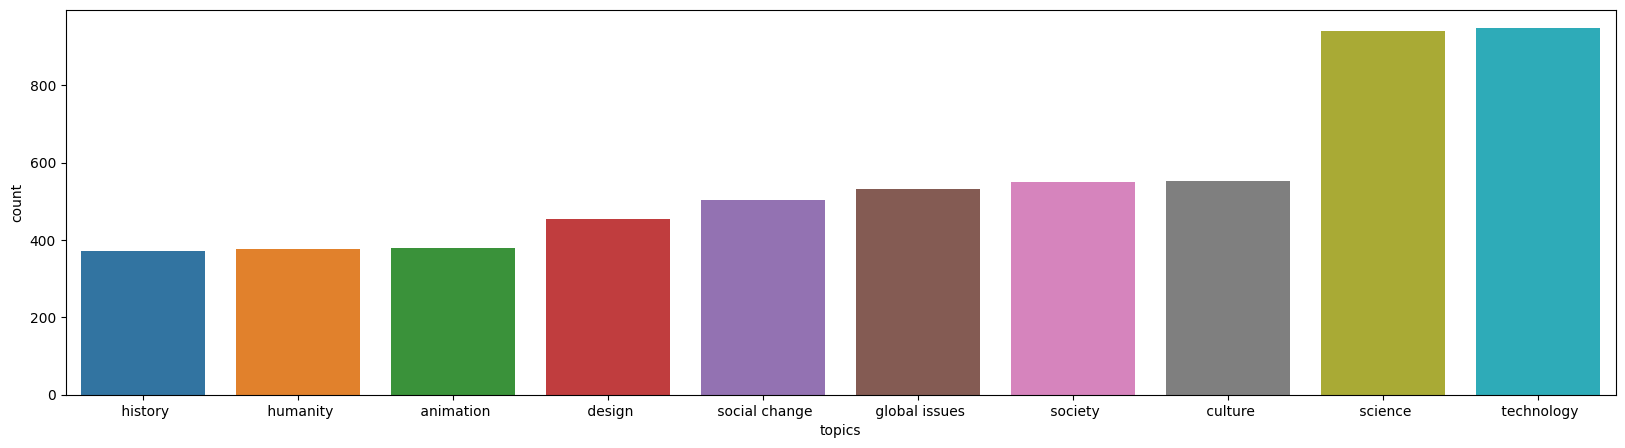

In [83]:
plt.subplots(figsize=(20,5))
sns.barplot(x='topics',y='count',data=d1)
#plt.figsize=(10,5000)

**Science and Technology has very high number of has highest number of TED Talks**

# **Analysing-Event**

In [84]:
data['event'].value_counts().nlargest(10)

TED-Ed            555
TED2018            96
TED2017            96
TED2019            91
TED2014            84
TED2009            81
TED2016            75
TED2013            75
TED2015            75
TEDGlobal 2012     70
Name: event, dtype: int64

In [85]:
#Top 10 events with most number of talks

Text(0, 0.5, 'count')

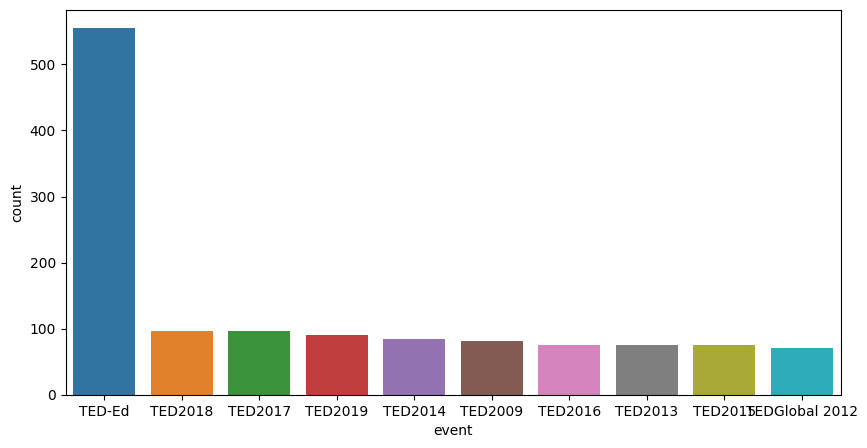

In [86]:
df1=data['event'].value_counts().nlargest(10).reset_index()
sns.barplot(x='index',y='event',data=df1)
plt.xlabel('event')
plt.ylabel('count')

**TED-Ed had the highest ted talks with otherwise no of events remaining same or slightly increasing**

In [87]:
df2=data.groupby('event')['daily_views'].mean()
df2=df2.to_dict()
data['avg_event_views']=data['event'].map(df2)

**Created new column to store avg views of ted talk grouped on events**

# **Dropping the unimportant columns**

In [88]:
data.head(2)

,speaker_1,occupations,views,recorded_date,published_date,event,available_lang,comments,duration,topics,related_talks,time_since_published,daily_views,avg_speaker_1_views,day,month,day_name,year,is_weekend,available_lang_count,topics_count,avg_event_views
0,Al Gore,{0: ['climate advocate']},3523392,2006-02-25,2006-06-27,TED2006,"['ar', 'bg', 'cs', 'de', 'el', 'en', 'es', 'fa...",272.0,977.0,"['alternative energy', 'cars', 'climate change...","{243: 'New thinking on the climate crisis', 54...",5056,696.735614,699.725014,27,6,Tuesday,2006,0,43,9,782.72889
1,Hans Rosling,{0: ['global health expert; data visionary']},14501685,2006-02-22,2006-06-27,TED2006,"['ar', 'az', 'bg', 'bn', 'bs', 'cs', 'da', 'de...",68.0,1190.0,"['Africa', 'Asia', 'Google', 'demo', 'economic...","{2056: ""Own your body's data"", 2296: 'A visual...",5056,2867.645837,1098.925286,27,6,Tuesday,2006,0,49,11,782.72889


In [89]:
data.columns

Index(['speaker_1', 'occupations', 'views', 'recorded_date', 'published_date',
       'event', 'available_lang', 'comments', 'duration', 'topics',
       'related_talks', 'time_since_published', 'daily_views',
       'avg_speaker_1_views', 'day', 'month', 'day_name', 'year', 'is_weekend',
       'available_lang_count', 'topics_count', 'avg_event_views'],
      dtype='object')

In [90]:
data=data.drop(['occupations','related_talks','views','recorded_date','published_date','event','available_lang','topics', 'day_name','speaker_1'],axis=1)

In [91]:
#Making our dependent variable as --daily_views
#Removing day--as weekend or not column is there


In [92]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3998 entries, 0 to 4003
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   comments              3998 non-null   float64
 1   duration              3998 non-null   float64
 2   time_since_published  3998 non-null   int64  
 3   daily_views           3998 non-null   float64
 4   avg_speaker_1_views   3998 non-null   float64
 5   day                   3998 non-null   int64  
 6   month                 3998 non-null   int64  
 7   year                  3998 non-null   int64  
 8   is_weekend            3998 non-null   int64  
 9   available_lang_count  3998 non-null   int64  
 10  topics_count          3998 non-null   int64  
 11  avg_event_views       3998 non-null   float64
dtypes: float64(5), int64(7)
memory usage: 535.1 KB


In [93]:
data1=data.copy()

In [94]:
data1=data1.drop('daily_views',axis=1)

<Axes: >

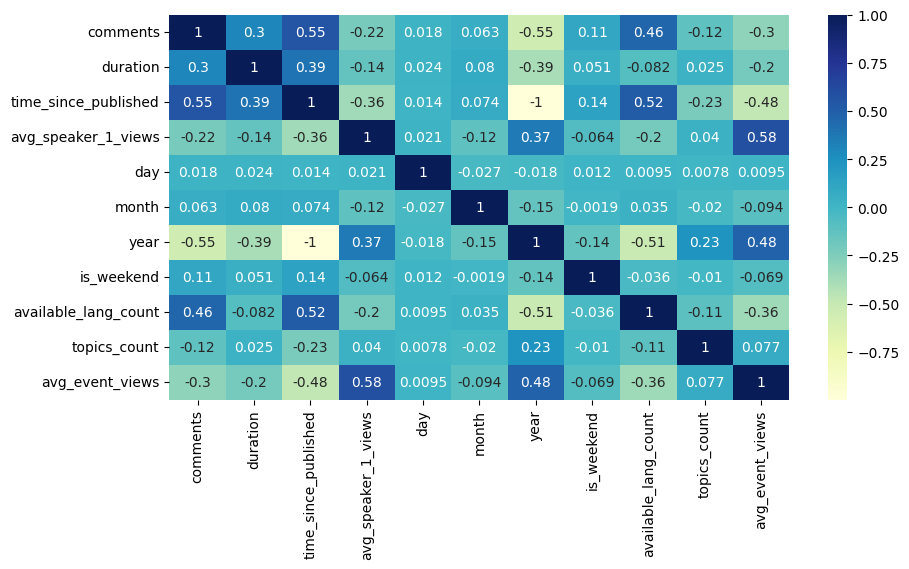

In [95]:
sns.heatmap(data1.corr(),cmap="YlGnBu",annot=True)

**High correlation between time_since_published and comments**<br>
**Significant correlation between time_since_published and available_lang_count**<br>
**Significant correlation between avg_speaker_1_views and avg_event_views**<br>

In [96]:
#There is some correlation between available language count and comments

In [97]:
#Applying VIF

In [98]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [99]:
vif_data = pd.DataFrame()
vif_data["feature"] = data1.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(data1.values, i)
                          for i in range(len(data1.columns))]
  
print(vif_data)

                 feature        VIF
0               comments   3.206440
1               duration   8.447356
2   time_since_published   6.532014
3    avg_speaker_1_views   1.938370
4                    day   4.130221
5                  month   4.205649
6                   year  32.254717
7             is_weekend   1.076392
8   available_lang_count  16.469470
9           topics_count   5.533595
10       avg_event_views   2.434649


In [100]:
data1=data1.drop('year',axis=1)

In [101]:
vif_data1 = pd.DataFrame()
vif_data1["feature"] = data1.columns
  
# calculating VIF for each feature
vif_data1["VIF"] = [variance_inflation_factor(data1.values, i)
                          for i in range(len(data1.columns))]
  
print(vif_data1)

                feature       VIF
0              comments  3.104877
1              duration  6.477750
2  time_since_published  6.519124
3   avg_speaker_1_views  1.933215
4                   day  3.779244
5                 month  3.805711
6            is_weekend  1.067237
7  available_lang_count  9.776843
8          topics_count  4.835879
9       avg_event_views  2.210836


In [102]:
#Very less correlation betweeen the variables

In [103]:
data1=data1.drop('day',axis=1)

In [104]:
data1.head()

,comments,duration,time_since_published,avg_speaker_1_views,month,is_weekend,available_lang_count,topics_count,avg_event_views
0,272.0,977.0,5056,699.725014,6,0,43,9,782.72889
1,68.0,1190.0,5056,1098.925286,6,0,49,11,782.72889
2,124.0,1286.0,5056,687.917181,6,0,26,9,782.72889
3,219.0,1116.0,5056,452.806229,6,0,35,9,782.72889
4,68.0,1164.0,5056,6453.203121,6,0,62,7,782.72889


# **Train-Test split**

In [105]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3998 entries, 0 to 4003
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   comments              3998 non-null   float64
 1   duration              3998 non-null   float64
 2   time_since_published  3998 non-null   int64  
 3   avg_speaker_1_views   3998 non-null   float64
 4   month                 3998 non-null   int64  
 5   is_weekend            3998 non-null   int64  
 6   available_lang_count  3998 non-null   int64  
 7   topics_count          3998 non-null   int64  
 8   avg_event_views       3998 non-null   float64
dtypes: float64(4), int64(5)
memory usage: 441.4 KB


In [106]:
X=data1
Y=data['daily_views']

In [107]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=57)

# **Standardizing Data--Using MinMax Scaler**

In [108]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [109]:
X_train=scaler.fit_transform(X_train)

In [110]:
X_test=scaler.transform(X_test)

# **Modelling**

# **Applying Linear Regression**

In [111]:
lr=LinearRegression()
lr.fit(X_train,Y_train)

Y_predict_train=lr.predict(X_train)
Y_predict_test=lr.predict(X_test)

In [112]:
print("MSE_training=",mean_squared_error(Y_train,Y_predict_train))
print("MSE_test    =",mean_squared_error(Y_test,Y_predict_test))

print("")
print("MSRT_training=",np.math.sqrt(mean_squared_error(Y_train,Y_predict_train)))
print("MSRT_test    =",np.math.sqrt(mean_squared_error(Y_test,Y_predict_test)))
print("")
print("R2_training=",r2_score(Y_train,Y_predict_train))
print("R2_test    =",r2_score(Y_test,Y_predict_test))


MSE_training= 13734743.983340144
MSE_test    = 9048703.58288068

MSRT_training= 3706.0415517557467
MSRT_test    = 3008.106311765041

R2_training= 0.7622013741527669
R2_test    = 0.810298007806457


# **Applying-Regularization on Linear Regression**

In [113]:
#Regularization --L1,L2

l1=Lasso()
param={'alpha':np.logspace(-8,8,100)}
l1_model=GridSearchCV(l1,param,cv=5)
l1_model.fit(X_train,Y_train)


print(l1_model.best_params_)
print(l1_model.best_score_)
print("")

Y_predict_train=l1_model.predict(X_train)
Y_predict_test=l1_model.predict(X_test)

print("MSE_training=",mean_squared_error(Y_train,Y_predict_train))
print("MSE_test    =",mean_squared_error(Y_test,Y_predict_test))

print("")

print("MSRT training=",np.math.sqrt(mean_squared_error(Y_train,Y_predict_train)))
print("MSRT test    =",np.math.sqrt(mean_squared_error(Y_test,Y_predict_test)))
print("")

print("R2 training=",r2_score(Y_train,Y_predict_train))
print("R2 test    =",r2_score(Y_test,Y_predict_test))

{'alpha': 104.76157527896662}
0.7509708068041311

MSE_training= 13811142.707672805
MSE_test    = 8688681.11337791

MSRT training= 3716.334579619118
MSRT test    = 2947.6568852866694

R2 training= 0.7608786329582586
R2 test    = 0.8178457166106582


In [114]:
Lasso(alpha=0.2803522716197166)

Lasso(alpha=0.2803522716197166)

In [115]:
l2=Ridge()
param={'alpha':np.logspace(-8,8,100)}
l2_model=GridSearchCV(l2,param,cv=5)
l2_model.fit(X_train,Y_train)


print(l2_model.best_params_)
print(l2_model.best_score_)
print("")

Y_predict_train=l2_model.predict(X_train)
Y_predict_test=l2_model.predict(X_test)

print("MSE_training=",mean_squared_error(Y_train,Y_predict_train))
print("MSE_test    =",mean_squared_error(Y_test,Y_predict_test))

print("")

print("MSRT training=",np.math.sqrt(mean_squared_error(Y_train,Y_predict_train)))
print("MSRT test    =",np.math.sqrt(mean_squared_error(Y_test,Y_predict_test)))
print("")

print("R2 training=",r2_score(Y_train,Y_predict_train))
print("R2 test    =",r2_score(Y_test,Y_predict_test))

{'alpha': 104.76157527896662}
0.7509095330076252

MSE_training= 13764151.308192125
MSE_test    = 8907230.498865942

MSRT training= 3710.0069148442467
MSRT test    = 2984.4983663701246

R2 training= 0.7616922258608055
R2 test    = 0.8132639272482359


# **Applying Tree Based Models**

# **Decision Tree Model**

In [116]:
dt1=DecisionTreeRegressor(criterion="squared_error",random_state=57)
dt1.fit(X_train,Y_train)

DecisionTreeRegressor(random_state=57)

In [117]:
Y_predict_train=dt1.predict(X_train)
Y_predict_test=dt1.predict(X_test)

In [118]:


print("MSE_training=",mean_squared_error(Y_train,Y_predict_train))
print("MSE_test    =",mean_squared_error(Y_test,Y_predict_test))

print("")

print("MSRT training=",np.math.sqrt(mean_squared_error(Y_train,Y_predict_train)))
print("MSRT test    =",np.math.sqrt(mean_squared_error(Y_test,Y_predict_test)))
print("")

print("R2 training=",r2_score(Y_train,Y_predict_train))
print("R2 test    =",r2_score(Y_test,Y_predict_test))

MSE_training= 0.0
MSE_test    = 11161328.829031749

MSRT training= 0.0
MSRT test    = 3340.8574990609445

R2 training= 1.0
R2 test    = 0.7660077717209861


**With a default Decision Tree lot of overfitting is occuring making the training error zero**

In [119]:
#Lot of overfitting is happening

In [120]:
dt1.get_params().keys()

dict_keys(['ccp_alpha', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'min_impurity_decrease', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'random_state', 'splitter'])

In [121]:

param_grid={'min_samples_split':[2,4,8,16],
            'max_depth':[1,3,5,7,9,11],
            'max_leaf_nodes':[2,4,6,8,10]
            }
dt_r=GridSearchCV(dt1,param_grid=param_grid,cv=5)


In [122]:
dt_r.fit(X_train,Y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(random_state=57),
             param_grid={'max_depth': [1, 3, 5, 7, 9, 11],
                         'max_leaf_nodes': [2, 4, 6, 8, 10],
                         'min_samples_split': [2, 4, 8, 16]})

In [123]:
Y_predict_train=dt_r.predict(X_train)
Y_predict_test=dt_r.predict(X_test)

In [124]:
dt_r.best_params_

{'max_depth': 7, 'max_leaf_nodes': 10, 'min_samples_split': 16}

In [125]:
dt_r_best=DecisionTreeRegressor(criterion='squared_error',random_state=0)
param_grid1={'min_samples_split':[2],
            'max_depth':[5],
            'max_leaf_nodes':[10]
            }
dt_r_best=GridSearchCV(dt_r_best,param_grid=param_grid1,cv=5)

In [126]:
dt_r_best.fit(X_train,Y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(random_state=0),
             param_grid={'max_depth': [5], 'max_leaf_nodes': [10],
                         'min_samples_split': [2]})

In [127]:

print("MSE_training=",mean_squared_error(Y_train,Y_predict_train))
print("MSE_test    =",mean_squared_error(Y_test,Y_predict_test))

print("")

print("MSRT training=",np.math.sqrt(mean_squared_error(Y_train,Y_predict_train)))
print("MSRT test    =",np.math.sqrt(mean_squared_error(Y_test,Y_predict_test)))
print("")

print("R2 training=",r2_score(Y_train,Y_predict_train))
print("R2 test    =",r2_score(Y_test,Y_predict_test))

MSE_training= 11233973.164213551
MSE_test    = 18367479.301598754

MSRT training= 3351.711975127569
MSRT test    = 4285.729728015844

R2 training= 0.8054988586248832
R2 test    = 0.6149340750116938


**Overfitting has considerably reduced after regularization though still R2 values are differing lot**

# **Applying Random Forest**

In [128]:
rf=RandomForestRegressor(criterion='squared_error',random_state=57)
rf.fit(X_train,Y_train)

RandomForestRegressor(random_state=57)

In [142]:
rf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 1.0,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 57,
 'verbose': 0,
 'warm_start': False}

In [129]:
Y_predict_train=rf.predict(X_train)
Y_predict_test=rf.predict(X_test)

In [130]:

print("MSE_training=",mean_squared_error(Y_train,Y_predict_train))
print("MSE_test    =",mean_squared_error(Y_test,Y_predict_test))

print("")

print("MSRT training=",np.math.sqrt(mean_squared_error(Y_train,Y_predict_train)))
print("MSRT test    =",np.math.sqrt(mean_squared_error(Y_test,Y_predict_test)))
print("")

print("R2 training=",r2_score(Y_train,Y_predict_train))
print("R2 test    =",r2_score(Y_test,Y_predict_test))

MSE_training= 2056035.404890841
MSE_test    = 6862645.974639011

MSRT training= 1433.8882121319086
MSRT test    = 2619.665240949502

R2 training= 0.9644025112831116
R2 test    = 0.8561277202658053


**Again overfitting is observed though getting better value of R2**

In [151]:
rf1=RandomForestRegressor(criterion='squared_error',random_state=0)
param_grid={'n_estimators':[100,150,200],
            'max_depth':[3,5,7,9],
            }
rf1=GridSearchCV(rf1,param_grid=param_grid,cv=5)

In [152]:
rf1.fit(X_train,Y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=0),
             param_grid={'max_depth': [3, 5, 7, 9],
                         'n_estimators': [100, 150, 200]})

In [153]:
rf1.best_params_

{'max_depth': 9, 'n_estimators': 100}

In [154]:
rf_best=RandomForestRegressor(criterion='squared_error',random_state=0)
param_grid={'n_estimators':[100],
            'max_depth':[9]}
rf_best=GridSearchCV(rf_best,param_grid=param_grid,cv=5)

In [155]:
rf_best.fit(X_train,Y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=0),
             param_grid={'max_depth': [9], 'n_estimators': [100]})

In [156]:
Y_predict_train=rf_best.predict(X_train)
Y_predict_test=rf_best.predict(X_test)

In [157]:
print("MSE_training=",mean_squared_error(Y_train,Y_predict_train))
print("MSE_test    =",mean_squared_error(Y_test,Y_predict_test))

print("")

print("MSRT training=",np.math.sqrt(mean_squared_error(Y_train,Y_predict_train)))
print("MSRT test    =",np.math.sqrt(mean_squared_error(Y_test,Y_predict_test)))
print("")

print("R2 training=",r2_score(Y_train,Y_predict_train))
print("R2 test    =",r2_score(Y_test,Y_predict_test))

MSE_training= 2629275.812384187
MSE_test    = 7230347.433327326

MSRT training= 1621.5041820433848
MSRT test    = 2688.930537095989

R2 training= 0.9544776243432915
R2 test    = 0.8484190249143947


In [138]:
#After doing hyperparameter tuning though error has slightly increased but overfitting has reduced

# **Applying Gradient Boosting**

In [161]:

gb=GradientBoostingRegressor(criterion='squared_error',random_state=57)
gb.fit(X_train,Y_train)

GradientBoostingRegressor(criterion='squared_error', random_state=57)

In [162]:
Y_predict_train=gb.predict(X_train)
Y_predict_test=gb.predict(X_test)

In [163]:
print("MSE_training=",mean_squared_error(Y_train,Y_predict_train))
print("MSE_test    =",mean_squared_error(Y_test,Y_predict_test))

print("")

print("MSRT training=",np.math.sqrt(mean_squared_error(Y_train,Y_predict_train)))
print("MSRT test    =",np.math.sqrt(mean_squared_error(Y_test,Y_predict_test)))
print("")

print("R2 training=",r2_score(Y_train,Y_predict_train))
print("R2 test    =",r2_score(Y_test,Y_predict_test))

MSE_training= 1974778.8530423793
MSE_test    = 9051283.892869683

MSRT training= 1405.2682494962944
MSRT test    = 3008.5351739458993

R2 training= 0.965809359229756
R2 test    = 0.8102439127705321


In [164]:
gb1=GradientBoostingRegressor(criterion='squared_error',random_state=0)
param_grid={'n_estimators':[100,150,200],
            'max_depth':[3,5,7,9],
            'learning_rate':[0.01,0.05,0.1,0.5,1]
            }
gb1=GridSearchCV(gb1,param_grid=param_grid,cv=5)

In [165]:
gb1.fit(X_train,Y_train)

GridSearchCV(cv=5,
             estimator=GradientBoostingRegressor(criterion='squared_error',
                                                 random_state=0),
             param_grid={'learning_rate': [0.01, 0.05, 0.1, 0.5, 1],
                         'max_depth': [3, 5, 7, 9],
                         'n_estimators': [100, 150, 200]})

In [167]:
gb1.best_params_

{'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 100}

In [168]:
gb_best=GradientBoostingRegressor(criterion='squared_error',random_state=0)
param_grid={'n_estimators':[100],
            'max_depth':[5],
            'learning_rate':[0.1]
            }
gb_best=GridSearchCV(gb_best,param_grid=param_grid,cv=5)

In [169]:
gb_best.fit(X_train,Y_train)

GridSearchCV(cv=5,
             estimator=GradientBoostingRegressor(criterion='squared_error',
                                                 random_state=0),
             param_grid={'learning_rate': [0.1], 'max_depth': [5],
                         'n_estimators': [100]})

In [170]:
Y_predict_train=gb_best.predict(X_train)
Y_predict_test=gb_best.predict(X_test)

In [171]:
print("MSE_training=",mean_squared_error(Y_train,Y_predict_train))
print("MSE_test    =",mean_squared_error(Y_test,Y_predict_test))

print("")

print("MSRT training=",np.math.sqrt(mean_squared_error(Y_train,Y_predict_train)))
print("MSRT test    =",np.math.sqrt(mean_squared_error(Y_test,Y_predict_test)))
print("")

print("R2 training=",r2_score(Y_train,Y_predict_train))
print("R2 test    =",r2_score(Y_test,Y_predict_test))

MSE_training= 459258.8654135918
MSE_test    = 8088584.99081318

MSRT training= 677.6864063957546
MSRT test    = 2844.0437744193005

R2 training= 0.9920485502142609
R2 test    = 0.8304264613455751


# **Applying-XGBoost**

In [173]:
xg=XGBRegressor()
xg.fit(X_train,Y_train)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [174]:
Y_predict_train=xg.predict(X_train)
Y_predict_test=xg.predict(X_test)

In [175]:
print("MSE_training=",mean_squared_error(Y_train,Y_predict_train))
print("MSE_test    =",mean_squared_error(Y_test,Y_predict_test))

print("")

print("MSRT training=",np.math.sqrt(mean_squared_error(Y_train,Y_predict_train)))
print("MSRT test    =",np.math.sqrt(mean_squared_error(Y_test,Y_predict_test)))
print("")

print("R2 training=",r2_score(Y_train,Y_predict_train))
print("R2 test    =",r2_score(Y_test,Y_predict_test))

MSE_training= 44373.54019487308
MSE_test    = 13804199.572218869

MSRT training= 210.65027936101362
MSRT test    = 3715.400324624369

R2 training= 0.9992317318113015
R2 test    = 0.7106011777818113


**Applying Hyperparameter Tuning**

In [176]:
xg1=XGBRegressor(random_state=0)
param_grid={'n_estimators':[100,150,200],
            'max_depth':[3,5,7,9],
            'learning_rate':[0.01,0.05,0.1,0.5,1]}
xg1=GridSearchCV(xg1,param_grid=param_grid,cv=5)

In [177]:
xg1.fit(X_train,Y_train)

GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None, gpu_id=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...one,
                                    max_cat_threshold=None,
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None, n_estimators=100,
                                    n_jobs=None, num_parallel_tree=None,
                                    predictor=None, random_state=0, ...),
             param_grid={'learning_rate': [0.01, 0.05, 0.1, 0.5, 1],
                         'max_depth': [3, 5, 7, 9],
                         'n_estimators': [100, 150, 200]})

In [178]:
Y_predict_train=xg1.predict(X_train)
Y_predict_test=xg1.predict(X_test)

In [180]:
xg1.best_params_

{'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 200}

In [181]:
xg_best=XGBRegressor(random_state=0)
param_grid={'n_estimators':[200],
            'max_depth':[5],
            'learning_rate':[0.01]}
xg_best=GridSearchCV(xg_best,param_grid=param_grid,cv=5)

In [182]:
xg_best.fit(X_train,Y_train)

GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None, gpu_id=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, max_bin=None,
                                    max_cat_threshold=None,
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None, n_estimators=100,
                                    n_jobs=None, num_parallel_tree=None,
                                    predictor=None, random_state=0, ...),
             param_grid={'learning_rate': [0.01], 'max_depth': [5],
                         'n_estimators': [200]})

In [185]:
Y_predict_train=xg_best.predict(X_train)
Y_predict_test=xg_best.predict(X_test)

In [186]:
print("MSE_training=",mean_squared_error(Y_train,Y_predict_train))
print("MSE_test    =",mean_squared_error(Y_test,Y_predict_test))

print("")

print("MSRT training=",np.math.sqrt(mean_squared_error(Y_train,Y_predict_train)))
print("MSRT test    =",np.math.sqrt(mean_squared_error(Y_test,Y_predict_test)))
print("")

print("R2 training=",r2_score(Y_train,Y_predict_train))
print("R2 test    =",r2_score(Y_test,Y_predict_test))

MSE_training= 5734634.314218766
MSE_test    = 11262460.504921399

MSRT training= 2394.709651339545
MSRT test    = 3355.95895459426

R2 training= 0.9007125170071079
R2 test    = 0.7638875917179154


# **Conclusion**

**The decision tree based models are performing better with Random Forest and XGBoost working quite well and having less overfitting**

# **Creating Pickle File**

In [187]:
import pickle

In [188]:

pickle.dump(rf_best,open('model_ted.pkl','wb'))

In [189]:
pickle.dump(scaler,open('model_ted_1.pkl','wb'))

# **Future Scope**

1) Applying NLP concepts to include title feature and check it's effect on views<br>
2) Use Related topics feature of a video and use it in the prediction<br>